# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Pra-pemrosesan

In [1]:
# Muat semua library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Memuat Data

In [2]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# tampilkan sampel data

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


1. Terdapat value yang tidak wajar pada kolom ___price___ dimana tercantum harga 1.000000.
2. Terdapat value yang tidak wajar pada kolom ___odometer___ dimana tercantum angka 0.000000.
3. Untuk kolom ___is_4wd___, saya menilai lebih cocok untuk diubah menjadi Boolean.
4. Untuk kolom ___condition___,akan lebih baik jika diubah keskala numerik, agar tingkatan kualitas mobil lebih mudah dianalisa.

1. Saya melihat tipe data dari kolom ___model_year___ dalam tipe float64, hal ini menurut saya tidak wajar untuk penulisan tahun.

2. Kolom ___cylinders___ seharusnya memiliki tipe data integer / int64, bukan float / float64. Karena jumlah silinder seharusnya tidak memiliki koma.

3. Kolom ___date_posted___ masih memiliki tipe data string / object, seharusnya dikonversikan menjadi date time.

Data terdiri dari 51525 baris data, terdapat missing values pada kolom ___model_year___, ___cylinders___, ___odometer___, ___paint_color___ dan ___is_4wd___.

In [6]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Dari antara kolom diatas, kolom ___is_4wd___ yang terindikasi memiliki missing values terbanyak, hampir setengah dari seluruh baris datasetnya kosong. 

### Kesimpulan dan Langkah-Langkah Selanjutnya

Data awal yang diterima seperti data awal pada umumnya, yaitu ada beberapa data yang kurang sesuai tipe datanya serta data yang hilang. Yang akan saya lakukan selanjutnya adalah menyesuaikan tipe data yang kurang sesuai dan semaksimal mungkin mengisi nilai yang hilang. Selain itu, ada beberapa kolom yang perlu ditambahkan untuk membantu analisa data. Ketiga kolom tersebut adalah:
- Menambahkan hari dalam minggu ketika iklan ditayangkan.
- menambah kolom usia kendaraan ketika iklan ditayangkan.
- Menambah kolom jarak tempuh kendaraan pertahun.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Berikut yang akan saya lakukan terhadap kolom-kolom yang memiliki nilai yang hilang:
- ___model_year___ akan diambil dari nilai median dari model mobil yang sama. Karena jika model mobilnya sama, artinya berada di rentang produksi yang tidak terlalu panjang.
- ___cylinders___ akan dilihat juga dari tipe mobil. 
- ___odometer___ mungkin bisa dilihat dari usia mobil, namun jika data tersebut kurang valid dan malah merusak data akan saya drop.
- ___paint_color___ mungkin bisa dilihat dari warna terbanyak dari tipe mobil yang sama, namun jika data tersebut kurang valid dan malah merusak data akan saya drop.
- ___is_4wd___ dilihat dari tipe mobil yang sama. Karena seharusnya tipe mobil yg sama memiliki tipe penggerak roda yang sama juga.

___model_year___

In [7]:
df_fill_model_year = df.copy()

Sebelum itu saya membuat copy dari df dulu sebelum memanipulasi data.

In [8]:
len(df_fill_model_year['model'].unique())

100

In [9]:
len(df_fill_model_year.loc[df['model_year'].isna(), 'model'].unique())

100

Ternyata ada 100 model mobil yang terdaftar dan dari masing-masing model ada data ___model_year___ yang hilang.

In [10]:
model_model_year= df_fill_model_year.pivot_table(index='model', values='model_year', aggfunc=['median', 'min', 'max'])
model_model_year.columns=['median_year', 'min_year', 'max_year']
model_model_year['median_year'].round()
model_model_year['range_year'] = model_model_year['max_year'] - model_model_year['min_year']
model_model_year.describe()

,median_year,min_year,max_year,range_year
count,100.000000,100.000000,100.000000,100.000000
mean,2010.450000,1989.260000,2018.330000,29.070000
std,2.995367,19.280817,1.651782,19.591925
min,2000.000000,1908.000000,2009.000000,0.000000
25%,2008.000000,1984.000000,2018.000000,17.000000
50%,2010.750000,1995.000000,2019.000000,23.500000
75%,2013.000000,2001.000000,2019.000000,35.000000
max,2018.000000,2013.000000,2019.000000,111.000000


Ternyata hipotesis saya sebelumnya salah. Karena ternyata rentang tahun produksi cukup panjang, bahkan ada yang sampai 100 tahun. Sehingga jika dipaksakan dapat menggangu akurasi datanya. 

Jadi saya memutuskan untuk mengganti data dengan ___`model_year`___ yang kosong dengan nilai `0`. Agar baris-baris data yang hilang tersebut tetap bisa dipakai untuk analisa lainnya yang tidak melibatkan model year. Dan jika ada analisa data yang melibatkan ___`model_year`___, maka saya akan memfilter data yang bernilai `0`.  

In [11]:
df_fill_model_year.loc[df_fill_model_year['model_year'].isna(), 'model_year'] = 0
df_fill_model_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [12]:
df_fill_model_year.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
39310,1200,1999.0,honda odyssey,fair,6.0,gas,NaN,automatic,van,blue,NaN,2018-12-05,22
51453,22999,2014.0,jeep wrangler unlimited,good,6.0,gas,NaN,automatic,SUV,silver,1.0,2018-09-01,58
10485,2995,2007.0,chevrolet impala,good,6.0,gas,128000.0,automatic,sedan,brown,NaN,2018-09-03,62
27450,4999,2008.0,ford escape,good,6.0,gas,99000.0,automatic,SUV,white,NaN,2019-04-02,30
5609,1000,2014.0,hyundai sonata,good,NaN,gas,NaN,automatic,sedan,grey,NaN,2019-03-29,15
25533,27995,2015.0,chevrolet silverado 2500hd,like new,NaN,diesel,115501.0,automatic,truck,NaN,1.0,2018-11-12,34
42093,6950,1990.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-10-01,25
5221,4995,2012.0,ford fusion se,good,4.0,gas,175000.0,automatic,sedan,white,NaN,2019-03-21,47
8698,5995,2017.0,chevrolet suburban,excellent,8.0,gas,121554.0,automatic,SUV,silver,NaN,2018-06-07,13
40577,15000,1997.0,ram 1500,like new,8.0,gas,NaN,automatic,pickup,NaN,1.0,2018-10-02,49


Data dari ___model_year___ yang hilang telah terisi semua setelah mengisi nilai NaN dengan 0.

___cylinders___

In [13]:
df_fill_cylinders = df_fill_model_year.copy() 

In [14]:
len(df_fill_cylinders.loc[df['cylinders'].isna(), 'model'].unique())

100

Setelah diperiksa ternyata dari setiap tipe mobil ada yang tidak memiiki data silinder. Sebelum diisi, saya akan memeriksa data distribusi kolom ___cylinders___.

In [15]:
model_cylinders = df_fill_cylinders.pivot_table(index='model', values='cylinders', aggfunc=['median', 'min', 'max'])
model_cylinders.columns=['median_cylinders', 'min_cylinders', 'max_cylinders']
model_cylinders['range_cylinders'] = model_cylinders['max_cylinders'] - model_cylinders['min_cylinders']
model_cylinders

,median_cylinders,min_cylinders,max_cylinders,range_cylinders
model,,,,
acura tl,6.0,4.0,6.0,2.0
bmw x5,6.0,6.0,8.0,2.0
buick enclave,6.0,4.0,8.0,4.0
cadillac escalade,8.0,6.0,10.0,4.0
chevrolet camaro,6.0,4.0,10.0,6.0
...,...,...,...,...
toyota sienna,6.0,4.0,8.0,4.0
toyota tacoma,6.0,4.0,8.0,4.0
toyota tundra,8.0,4.0,10.0,6.0


In [16]:
model_cylinders.describe()

,median_cylinders,min_cylinders,max_cylinders,range_cylinders
count,100.000000,100.000000,100.00000,100.000000
mean,5.930000,4.410000,8.22000,3.810000
std,1.545636,1.256056,1.86179,1.983238
min,4.000000,3.000000,4.00000,0.000000
25%,4.000000,4.000000,6.00000,2.000000
50%,6.000000,4.000000,8.00000,4.000000
75%,8.000000,5.000000,10.00000,6.000000
max,8.000000,8.000000,12.00000,7.000000


Dari kedua tabel diatas dapat dilihat bahwa tenyata dari setiap tipe mobil memiliki jumlah silinder yang berbeda. Jumlah silinder paling kecil 4 dan yang paling besar 12 silinder. Namun rentang perbedaannya tidak sebesar tahun produksi mobil. Sehingga berdasarkan data diatas, saya memilih menggunakan ___median_cylinders___, dari setiap mobil untuk mengisi data yang kosong pada kolom ___cylinders___.

In [17]:
model_cylinders.reset_index(inplace=True)
model_cylinders.drop(columns=['min_cylinders', 'max_cylinders', 'range_cylinders'], inplace=True)
model_cylinders

,model,median_cylinders
0,acura tl,6.0
1,bmw x5,6.0
2,buick enclave,6.0
3,cadillac escalade,8.0
4,chevrolet camaro,6.0
...,...,...
95,toyota sienna,6.0
96,toyota tacoma,6.0
97,toyota tundra,8.0
98,volkswagen jetta,4.0


variabel ___model_cylinders___ merupakan dictionary dari model mobil dengan median silinder tipe mobil tersebut. Dictionary ini untuk mengisi nilai silinder yang kosong.

In [18]:
df_fill_cylinders= df_fill_cylinders.merge(model_cylinders, on='model')
df_fill_cylinders.loc[df_fill_cylinders['cylinders'].isna(), 'cylinders'] = df_fill_cylinders['median_cylinders']

In [19]:
df_fill_cylinders.drop(columns=['median_cylinders'], inplace=True)
df_fill_cylinders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 7.5+ MB


In [20]:
df_fill_cylinders.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
30213,23700,2012.0,chevrolet silverado 1500 crew,good,8.0,other,69754.0,other,pickup,black,1.0,2018-05-14,75
42805,3495,2006.0,toyota corolla,good,4.0,gas,200961.0,automatic,sedan,blue,NaN,2018-07-29,41
44194,5000,2008.0,buick enclave,good,6.0,gas,198000.0,automatic,SUV,silver,1.0,2019-03-25,5
46871,25900,2014.0,ram 2500,good,6.0,diesel,150050.0,automatic,truck,grey,1.0,2018-06-04,24
40598,4750,1998.0,gmc sierra 1500,good,8.0,gas,197000.0,automatic,pickup,green,1.0,2018-09-04,18
45926,10000,2007.0,ram 2500,good,8.0,gas,59600.0,automatic,truck,white,NaN,2019-02-02,53
8759,12990,2013.0,honda accord,excellent,6.0,gas,118659.0,automatic,coupe,red,NaN,2018-05-02,6
44021,7950,2008.0,buick enclave,good,6.0,gas,104241.0,automatic,SUV,white,NaN,2018-06-30,47
49677,2200,2003.0,ford focus se,good,4.0,gas,NaN,automatic,sedan,green,NaN,2018-09-22,51
49610,4900,2013.0,ford focus se,good,4.0,gas,108000.0,automatic,sedan,silver,NaN,2019-01-16,16


Data yang hilang di kolom ___cylinders___ telah terisi dari nilai ___median_cylinders___. Setelah terisi kolom ___median_cylinders___ saya drop karena kolom tersebut sudah tidak terpakai.

___odometer___

In [21]:
df_fill_odometer = df_fill_cylinders.copy()

Saya akan menguji hipotesis usia mobil memiliki hubungan dengan ___odometer___. Namun usia mobil belum ada. Karena itu saya akan membuat kolom usia mobil terlebih dahulu.

In [22]:
df_fill_odometer['date_posted'] = pd.to_datetime(df_fill_odometer['date_posted'], format='%Y-%m-%d')
df_fill_odometer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 7.5+ MB


In [23]:
df_fill_odometer['year_posted'] = pd.DatetimeIndex(df_fill_odometer['date_posted']).year
df_fill_odometer.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2018
1,3200,2004.0,bmw x5,excellent,6.0,gas,NaN,automatic,SUV,black,1.0,2019-04-09,10,2019
2,8499,2009.0,bmw x5,good,6.0,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52,2019
3,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,1.0,2018-08-11,19,2018
4,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,1.0,2018-07-07,9,2018


saya telah menambahkan kolom tahun posting iklan tersebut. Kolom tersebut diperlukan untuk mendapatkan tahun usia mobil.

In [24]:
df_fill_odometer['car_age'] = df_fill_odometer['year_posted'] - df_fill_odometer['model_year']
df_fill_odometer['car_age'] = df_fill_odometer['car_age'].astype(int)
df_fill_odometer.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
24501,4000,2013.0,ford focus,good,4.0,gas,NaN,automatic,sedan,white,NaN,2018-10-10,65,2018,5
41524,19995,2013.0,cadillac escalade,excellent,8.0,gas,101882.0,automatic,SUV,white,1.0,2019-04-01,21,2019,6
10037,16999,2012.0,ram 1500,excellent,8.0,gas,106610.0,automatic,pickup,NaN,NaN,2018-08-13,65,2018,6
33099,19500,2018.0,ford edge,like new,6.0,gas,24053.0,automatic,SUV,silver,1.0,2018-09-11,14,2018,0
22267,4995,2005.0,honda cr-v,good,4.0,gas,178965.0,automatic,wagon,black,1.0,2019-04-13,8,2019,14


Data usia telah ada, maka saya akan mencoba melihat korelasinya dengan ___odometer___.

In [25]:
check_corr_odo_w_age = df_fill_odometer.loc[df_fill_odometer['model_year'] > 0]
check_corr_odo_w_age.loc[check_corr_odo_w_age['model_year'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age


Saya telah meyingkirkan nilai 0 pada ___model_year___ sebelum melihat korelasinya

In [26]:
check_corr_odo_w_age.loc[check_corr_odo_w_age['odometer'].isna(), 'odometer'] = 0
check_corr_odo_w_age['odometer'] = check_corr_odo_w_age['odometer'].astype(int)
check_corr_odo_w_age = check_corr_odo_w_age.query('odometer > 0')
check_corr_odo_w_age.loc[check_corr_odo_w_age['odometer'] == 0]

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_154/332669759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_corr_odo_w_age['odometer'] = check_corr_odo_w_age['odometer'].astype(int)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age


In [27]:
check_corr_odo_w_age.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
4769,4695,2011.0,toyota camry,good,4.0,gas,148000,automatic,sedan,white,NaN,2018-11-22,26,2018,7
25095,10500,2014.0,honda civic,excellent,4.0,gas,60150,automatic,sedan,NaN,NaN,2018-05-28,76,2018,4
2678,28900,2015.0,ford f-150,good,6.0,gas,117397,automatic,truck,white,1.0,2018-12-17,46,2018,3
34069,5000,1997.0,ford f-250,excellent,8.0,gas,130983,automatic,truck,white,NaN,2018-06-22,9,2018,21
21470,12990,2012.0,chevrolet equinox,good,4.0,gas,67034,automatic,SUV,black,1.0,2018-11-23,22,2018,6
4832,15375,2017.0,toyota camry,like new,4.0,gas,36500,automatic,sedan,silver,NaN,2018-11-23,36,2018,1
43458,8995,2013.0,volkswagen passat,like new,4.0,diesel,87150,automatic,sedan,white,NaN,2019-02-04,11,2019,6
35483,61361,2018.0,chevrolet suburban,excellent,8.0,gas,3825,automatic,SUV,red,1.0,2018-11-11,61,2018,0
36963,1200,2007.0,acura tl,good,4.0,gas,141750,automatic,sedan,black,NaN,2018-06-10,35,2018,11
34039,27400,2016.0,ford f-250,excellent,8.0,gas,58270,automatic,pickup,white,1.0,2018-07-06,6,2018,2


<AxesSubplot:title={'center':'Korelasi Odometer dengan Usia Mobil'}, xlabel='car_age', ylabel='odometer'>

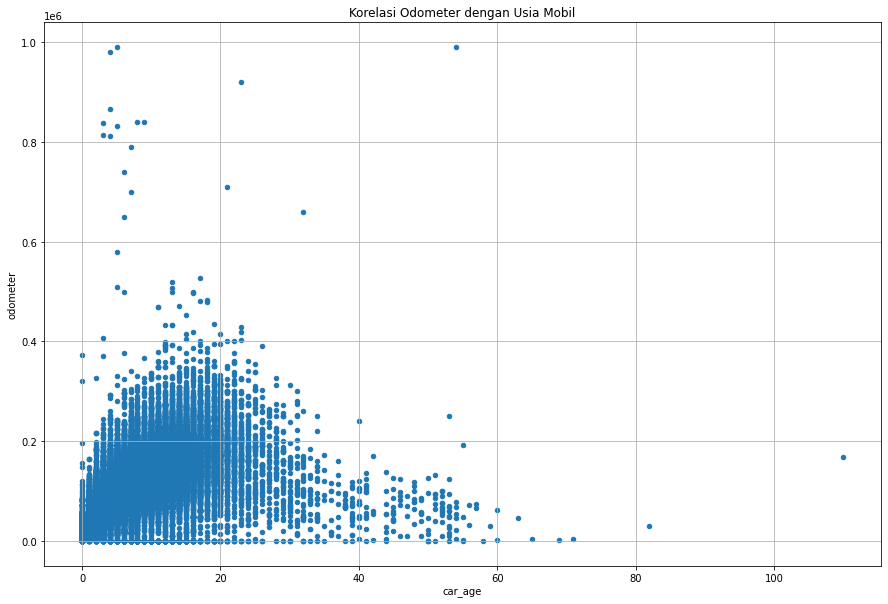

In [28]:
check_corr_odo_w_age.plot(kind='scatter', x='car_age', y='odometer', grid=True, figsize = (15,10), title='Korelasi Odometer dengan Usia Mobil' )

In [29]:
check_corr_odo_w_age['car_age'].corr(check_corr_odo_w_age['odometer'])

0.4828788098059994

Scatterplot menunjukan sangat tebal pada mobil usia mobil 0 - 20. Artinya mungkin kebanyakan usia mobil berada pada data berada pada rentang usia tersebut. ketika memasuki usia diatas 20 tahun, odometernya cenderung lebih rendah, mungkin mobil-mobil yang pada rentang diatas 20 tahun mungkin merupakan mobil koleksi.

Dari angka koefisiennya korelasinya juga menunjukan usia mobil kurang berkorelasi dengan ___odometer___.

Dari data diatas maka saya akan mengganti nilai yang hilang pada kolom odometer dengan nilai 0. Seperti yang dilakukan sebelumnnya pada ___model_year___.

In [30]:
df_fill_odometer.loc[df_fill_odometer['odometer'].isna(), 'odometer'] = 0
df_fill_odometer.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
26656,27800,2016.0,ford f150 supercrew cab xlt,good,6.0,gas,47570.0,other,pickup,white,1.0,2018-11-06,31,2018,2
50344,7900,2006.0,dodge dakota,good,8.0,gas,141200.0,automatic,truck,silver,1.0,2018-09-23,41,2018,12
13985,9800,2007.0,chevrolet silverado,excellent,8.0,gas,171580.0,automatic,truck,white,1.0,2019-01-03,23,2019,12
15612,3800,2012.0,chevrolet malibu,good,4.0,gas,138100.0,automatic,sedan,silver,NaN,2018-11-27,22,2018,6
16880,3999,2011.0,chevrolet impala,good,6.0,gas,127950.0,automatic,sedan,NaN,NaN,2018-12-24,13,2018,7
34995,19500,2014.0,ford f150,excellent,8.0,gas,96000.0,automatic,pickup,NaN,1.0,2018-09-24,57,2018,4
1401,9500,2008.0,ford f-150,excellent,8.0,gas,0.0,automatic,truck,grey,1.0,2018-05-11,29,2018,10
17946,4999,2005.0,toyota camry le,excellent,4.0,gas,133000.0,automatic,sedan,red,NaN,2018-06-12,54,2018,13
7568,12450,2013.0,chevrolet silverado 1500,excellent,8.0,gas,162184.0,automatic,truck,black,1.0,2018-12-21,8,2018,5
510,5450,2009.0,ford f-150,good,8.0,gas,154715.0,automatic,truck,white,1.0,2019-01-25,37,2019,10


In [31]:
df_fill_odometer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
 14  car_age       51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), in

Data yang hilang paada kolom odometer telah terisi dengan nilai 0. Data tersebut akan difilter ketika membutuhkan kolom ___odometer___.

___paint_color___

Karena warna adalah selera, dan daripada saya mengisi dengan nilai modus yang mana mungkin dapat mengganggu akurasi data. Maka data yang hilang pada kolom ___paint_color___ akan saya isi dengan unknown. Agar baris dari data yang hilang tersebut masih dapat digunakan untuk analisa yang tidak berkaitan dengan kolom ___paint_color___.

In [32]:
df_fill_paint_color = df_fill_odometer.copy()
df_fill_paint_color.loc[df_fill_paint_color['paint_color'].isna(), 'paint_color'] = 'unknown'
df_fill_paint_color.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
29010,3000,2007.0,subaru impreza,fair,4.0,gas,235000.0,manual,wagon,silver,1.0,2018-08-05,58,2018,11
45384,5495,2000.0,toyota tundra,good,8.0,gas,232090.0,automatic,truck,unknown,NaN,2018-06-28,21,2018,18
24972,850,2003.0,honda civic,salvage,4.0,hybrid,229704.0,automatic,sedan,brown,NaN,2018-12-23,39,2018,15
41739,7900,2015.0,volkswagen jetta,like new,4.0,gas,82000.0,automatic,sedan,black,1.0,2019-01-17,12,2019,4
38735,7950,2013.0,ford escape,excellent,4.0,gas,102000.0,automatic,SUV,blue,NaN,2019-01-14,75,2019,6
36411,17655,2018.0,dodge grand caravan,excellent,6.0,gas,0.0,automatic,mini-van,silver,NaN,2018-06-16,27,2018,0
8666,5950,2007.0,honda accord,excellent,4.0,gas,95804.0,other,sedan,unknown,NaN,2018-10-16,15,2018,11
19871,5800,2005.0,toyota highlander,like new,6.0,gas,0.0,automatic,SUV,blue,1.0,2018-11-01,51,2018,13
44473,5500,2013.0,ford fusion,good,4.0,gas,121000.0,automatic,sedan,silver,NaN,2018-06-17,22,2018,5
41692,4995,2000.0,cadillac escalade,good,8.0,gas,239500.0,automatic,SUV,silver,1.0,2018-11-26,62,2018,18


In [33]:
df_fill_paint_color.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
 14  car_age       51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), in

Data yang hilang pada kolom ___paint_color___ telah terisi dengan unknown.

___is_4wd___

In [34]:
df_fill_is_4wd = df_fill_paint_color.copy()

In [35]:
df_fill_is_4wd.loc[df_fill_is_4wd['is_4wd'] == 0,]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age


In [36]:
df_fill_is_4wd['is_4wd'].sum()

25572.0

Dari dua cell diatas saya memeriksa apakah ada nilai 0 pada data pada kolom ___is_4wd___. Setelah difilter, ternyata tidak ada nilai 0 pada kolom ___is_4wd___. Dan jika diperiksa dengan sum(), dan hasilnya menunjukan semua baris yang terisi pada kolom ___is_4wd___ bernilai 1, atau dapat diartikan memiliki penggerak 4 roda.

Lalu langkah selanjutnya, baris-baris yang hilang pada kolom ___is_4wd___ akan saya isi dengan nilai 0. Argumen saya kemungkinan baris yang nilainya yang hilang pada kolom ___is_4wd___ bernilai 0 namun menjadi NaN disebabkan kesalahan input atau administrasi. Karena sepertinya tidak mungkin seluruh mobil didalam dataset memiliki penggerak 4 roda.

In [37]:
df_fill_is_4wd.loc[df_fill_is_4wd['is_4wd'].isna(), 'is_4wd'] = 0
df_fill_is_4wd.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
20870,18985,0.0,toyota tacoma,excellent,6.0,gas,132925.0,automatic,pickup,white,1.0,2019-01-24,75,2019,2019
26726,18800,2015.0,chevrolet camaro lt coupe 2d,good,6.0,gas,33926.0,other,coupe,grey,0.0,2019-01-16,152,2019,4
14420,20545,2010.0,jeep wrangler,excellent,6.0,gas,88789.0,automatic,SUV,black,1.0,2018-08-03,45,2018,8
43160,7990,2012.0,chrysler town & country,excellent,6.0,gas,91000.0,automatic,mini-van,unknown,0.0,2018-10-13,99,2018,6
19794,10995,2008.0,toyota highlander,excellent,6.0,gas,164250.0,automatic,other,grey,1.0,2018-10-14,39,2018,10
624,27495,2016.0,ford f-150,excellent,6.0,gas,0.0,automatic,truck,unknown,1.0,2018-11-22,36,2018,2
33803,2200,1989.0,ford f-250,fair,8.0,gas,122000.0,manual,pickup,blue,1.0,2018-09-27,87,2018,29
33345,6000,2011.0,ford edge,good,6.0,diesel,181000.0,automatic,SUV,blue,0.0,2018-05-25,13,2018,7
44269,18850,2015.0,buick enclave,good,6.0,gas,75200.0,automatic,SUV,blue,1.0,2019-02-02,134,2019,4
1426,14500,2013.0,ford f-150,excellent,8.0,gas,135300.0,automatic,truck,black,1.0,2019-03-21,8,2019,6


In [38]:
df_fill_is_4wd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
 14  car_age       51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), in

Seluruh data telah lengkap. Maka langkah selanjutnya adalah mengganti tipe data yang kurang sesuai.

## Memperbaiki Tipe Data

In [39]:
df_all_filled = df_fill_is_4wd.copy()
df_all_filled.sample(25)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
29795,29900,2016.0,ford f-250 sd,good,8.0,gas,122466.0,automatic,truck,grey,1.0,2018-09-29,15,2018,2
7612,12950,2006.0,chevrolet silverado 1500,excellent,8.0,gas,170755.0,automatic,truck,red,1.0,2018-10-31,90,2018,12
42774,2000,2003.0,toyota corolla,good,4.0,gas,166500.0,automatic,sedan,unknown,0.0,2018-07-28,24,2018,15
6050,6995,2003.0,chevrolet silverado 1500,good,8.0,gas,83190.0,automatic,truck,blue,0.0,2018-05-19,13,2018,15
33204,34988,2018.0,ford edge,good,6.0,gas,0.0,automatic,SUV,unknown,1.0,2018-08-28,25,2018,0
22260,14900,2012.0,honda cr-v,excellent,4.0,gas,41250.0,automatic,SUV,silver,1.0,2018-06-29,41,2018,6
42953,3295,0.0,chrysler town & country,excellent,6.0,gas,149000.0,automatic,mini-van,blue,0.0,2018-12-29,38,2018,2018
5825,24500,2015.0,chevrolet silverado 1500,like new,8.0,gas,98500.0,automatic,truck,unknown,1.0,2018-11-15,91,2018,3
46721,38500,2016.0,ram 2500,excellent,6.0,gas,0.0,automatic,pickup,blue,1.0,2019-03-08,44,2019,3
20008,1,2017.0,dodge charger,excellent,8.0,gas,37790.0,automatic,sedan,red,0.0,2018-07-13,53,2018,1


Jika dilihat dari tabel diatas ada beberapa kolom yang perlu disesuaikan tipe datanya:

1. ___model_year___ lebih sesuai dengan tipe data integer karena seharusnya penulisan tahun tidak memiliki desimalnya.
2. ___condition___ sebaiknya diterjemahkan menjadi numerik yang menunjukkan tingkatan atau skala ordinal. Agar lebih mudah menganalisa kualitas kondisi kendaraan.
3. ___cylinder___ lebih sesuai dengan tipe data integer karena jumlah silinder tidak memiliki desimal.
4. ___odometer___ lebih sesuai dengan tipe data integer karena data yang ada tidak memiliki nilai desimal.
5. ___is_4wd___ lebih sesuai dengan tipe data boolean karena hanya 0 atau 1.

In [40]:
float_to_int_col = ['model_year', 'cylinders', 'odometer']

def float_to_int(dataframe, a_list):
    for elem in a_list:
        dataframe[elem] = dataframe[elem].astype(int)
    return dataframe

df_all_filled = float_to_int(df_all_filled, float_to_int_col)
df_all_filled.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,2018,7
1,3200,2004,bmw x5,excellent,6,gas,0,automatic,SUV,black,1.0,2019-04-09,10,2019,15
2,8499,2009,bmw x5,good,6,gas,104482,automatic,SUV,blue,1.0,2019-03-04,52,2019,10
3,22914,2015,bmw x5,excellent,6,gas,69686,automatic,SUV,white,1.0,2018-08-11,19,2018,3
4,22914,2015,bmw x5,excellent,6,gas,69686,automatic,SUV,white,1.0,2018-07-07,9,2018,3


Kolom ___model_year, cylinders, & odometer___ telah berubah dari tipe data float menjadi integer.

In [41]:
def change_condition(value):
    if value == 'new':
        result = 5
    elif value == 'like new':
        result = 4
    elif value == 'excellent':
        result = 3
    elif value == 'good':
        result = 2
    elif value == 'fair':
        result = 1
    else:
        result = 0
    
    return result

df_all_filled['condition'] = df_all_filled['condition'].apply(change_condition)

df_all_filled.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,2018,7
1,3200,2004,bmw x5,3,6,gas,0,automatic,SUV,black,1.0,2019-04-09,10,2019,15
2,8499,2009,bmw x5,2,6,gas,104482,automatic,SUV,blue,1.0,2019-03-04,52,2019,10
3,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,1.0,2018-08-11,19,2018,3
4,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,1.0,2018-07-07,9,2018,3


Data kolom ___condition___ telah diubah menjadi tipe data integer.

In [42]:
df_all_filled['is_4wd'] = df_all_filled['is_4wd'].astype(bool)
df_all_filled.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7
1,3200,2004,bmw x5,3,6,gas,0,automatic,SUV,black,True,2019-04-09,10,2019,15
2,8499,2009,bmw x5,2,6,gas,104482,automatic,SUV,blue,True,2019-03-04,52,2019,10
3,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-08-11,19,2018,3
4,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-07-07,9,2018,3


kolom ___is_4wd___ telah berubah menjadi tipe data Boolean. Artinya semua kolom telah disesuaikan tipe datanya.

## Memperbaiki Kualitas Data

In [43]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 

df_all_filled['weekday_posted'] = df_all_filled['date_posted'].dt.weekday
df_all_filled['month_posted'] = df_all_filled['date_posted'].dt.month
df_all_filled['day_posted'] = df_all_filled['date_posted'].dt.day
df_all_filled.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age,weekday_posted,month_posted,day_posted
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7,5,6,23
1,3200,2004,bmw x5,3,6,gas,0,automatic,SUV,black,True,2019-04-09,10,2019,15,1,4,9
2,8499,2009,bmw x5,2,6,gas,104482,automatic,SUV,blue,True,2019-03-04,52,2019,10,0,3,4
3,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-08-11,19,2018,3,5,8,11
4,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-07-07,9,2018,3,5,7,7


kolom hari dalam minggu, tanggal, bulan, dan tahun iklan ditayangkan telah ditambahkan kedalam dataset.

In [44]:
# Tambahkan usia kendaraan saat iklan ditayangkan

df_all_filled['car_age'].head()

0     7
1    15
2    10
3     3
4     3
Name: car_age, dtype: int64

In [45]:
df_all_filled.loc[df_all_filled['car_age'] == 0,'car_age'] = 1

Kolom ___car_age___ telah ditambahkan pada cell sebelumnya dibagian 1.2.3 odometer untuk keperluan analisa data.

In [46]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 

df_all_filled['distance_per_year'] = df_all_filled['odometer'] / df_all_filled['car_age']
df_all_filled['distance_per_year'] = df_all_filled['distance_per_year'].round(decimals=2)
df_all_filled.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age,weekday_posted,month_posted,day_posted,distance_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7,5,6,23,20714.29
1,3200,2004,bmw x5,3,6,gas,0,automatic,SUV,black,True,2019-04-09,10,2019,15,1,4,9,0.00
2,8499,2009,bmw x5,2,6,gas,104482,automatic,SUV,blue,True,2019-03-04,52,2019,10,0,3,4,10448.20
3,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-08-11,19,2018,3,5,8,11,23228.67
4,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-07-07,9,2018,3,5,7,7,23228.67


In [47]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 

df_all_filled['condition'].head()

0    2
1    3
2    2
3    3
4    3
Name: condition, dtype: int64

Telah dilakukan pada beberapa cell sebelumnya. __Dibagian 1.3 Memperbaiki Tipe Data__.

In [48]:
df_all_filled.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,car_age,weekday_posted,month_posted,day_posted,distance_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,1868.590121,2.637535,6.121067,97854.326948,39.55476,2018.307462,149.758641,3.005434,6.628491,15.449491,14173.698473
std,10040.803015,513.626950,0.712447,1.657457,72940.007970,28.20427,0.461447,513.615213,1.997759,3.474134,8.736521,14018.678057
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.00000,2018.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,5000.000000,2005.000000,2.000000,4.000000,35896.000000,19.00000,2018.000000,4.000000,1.000000,3.000000,8.000000,3980.500000
50%,9000.000000,2010.000000,3.000000,6.000000,99114.000000,33.00000,2018.000000,8.000000,3.000000,7.000000,15.000000,12637.670000
75%,16839.000000,2014.000000,3.000000,8.000000,146541.000000,53.00000,2019.000000,13.000000,5.000000,10.000000,23.000000,19230.770000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,2019.000000,2019.000000,6.000000,12.000000,31.000000,373200.000000


In [97]:
df_all_filled.duplicated().sum()

0

Tidak ada data duplikat.

In [98]:
df_all_filled.columns.tolist()

['price',
 'model_year',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'transmission',
 'type',
 'paint_color',
 'is_4wd',
 'date_posted',
 'days_listed',
 'year_posted',
 'car_age',
 'weekday_posted',
 'month_posted',
 'day_posted',
 'distance_per_year']

In [99]:
cols_order = ['price',
 'model_year',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'transmission',
 'type',
 'paint_color',
 'is_4wd',
 'date_posted',
 'days_listed',
 'year_posted',
 'month_posted',
 'day_posted',
 'weekday_posted',
 'car_age',
 'distance_per_year']
df_all_filled = df_all_filled[cols_order]

In [100]:
# tampilkan informasi/rangkuman umum tentang DataFrame

df_all_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  int64         
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  year_posted        51525 non-null  int64         
 14  month_

In [101]:
# tampilkan sampel data 

df_all_filled.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,weekday_posted,car_age,distance_per_year
38366,15905,2013,hyundai santa fe,2,6,gas,71230,automatic,SUV,black,True,2018-09-28,25,2018,9,28,4,5,14246.00
34241,243,2016,nissan sentra,3,4,gas,0,automatic,sedan,unknown,False,2018-06-23,11,2018,6,23,5,2,0.00
42020,1800,2004,volkswagen jetta,1,6,gas,131000,manual,sedan,grey,False,2018-12-13,28,2018,12,13,3,14,9357.14
32858,28900,0,ford f-350 sd,3,8,diesel,0,automatic,truck,white,True,2018-09-28,55,2018,9,28,4,2018,0.00
10161,4900,2007,ram 1500,2,8,gas,168815,automatic,pickup,black,True,2019-01-15,61,2019,1,15,1,12,14067.92
24977,5200,2012,honda civic,2,4,gas,0,automatic,sedan,black,False,2018-05-31,64,2018,5,31,3,6,0.00
38414,12995,2013,hyundai santa fe,3,6,gas,0,automatic,SUV,grey,True,2018-05-15,15,2018,5,15,1,5,0.00
20136,1,2017,dodge charger,3,6,gas,37790,automatic,sedan,red,False,2019-02-02,73,2019,2,2,5,2,18895.00
7681,18000,2016,chevrolet silverado 1500,3,6,gas,50289,automatic,truck,white,False,2018-11-13,64,2018,11,13,1,2,25144.50
4918,1300,1995,toyota camry,2,4,gas,185000,automatic,sedan,brown,False,2019-01-20,39,2019,1,20,6,24,7708.33


Tipe data sudah disesuaikan dan data yang hilang sudah terisi. Namun, ada beberapa catatan saat tahap mengeksplorasi data selanjutnya. Berikut point-pointnya:

1. Pada kolom ___price___ ada nilai 1. Tidak masuk akal harga sebuah mobil bernilai 1 dollar. Oleh karena itu, saat mengeksplorasi yang berhubungan dengan kolom price perlu difilter nilai 1 pada kolom price.
2. Pada kolom ___model_year___ data yang hilang diisi dengan nilai 0. Karena itu ketika mengeksplorasi data pada kolom ___model_year___ dan kolom lain yang berhubungan (___car_age dan distance_per_year___). Perlu difilter data nilai 0 pada kolom ___model_year___.
3. Pada kolom ___odometer___ data yang hilang diisi dengan nilai 0. Karena itu ketika mengeksplorasi data pada kolom ___odometer___ dan kolom lain yang berhubungan (___distance_per_year___). Perlu difilter data nilai 0 pada kolom ___odometer___.
4. Pada kolom ___paint_color___ data yang hilang diisi dengan nilai unknown. Karena itu ketika mengeksplorasi data pada kolom ___paint_color___, Perlu difilter data nilai unknown pada kolom ___paint_color___.

## Mempelajari Parameter Inti 
[Pilih pendekatan yang tepat untuk mempelajari parameter yang tercantum di bawah ini, berikan perhatian khusus bagaimana *outlier* memengaruhi bentuk dan kemudahan pembacaan histogram.]

- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

__Harga__

In [102]:
df_price_wo_0 = df_all_filled.loc[df_all_filled['price'] > 1, 'price']
df_price_desc = df_price_wo_0.describe()
df_price_desc

count     50727.000000
mean      12323.308238
std       10002.603186
min           3.000000
25%        5299.000000
50%        9495.000000
75%       16907.000000
max      375000.000000
Name: price, dtype: float64

Meskipun telah difilter nilai 0 tapi ternyata masih ada nilai 3. Tidak masuk akal ada sebuah mobil seharga 3 dollar. Menurut informasi dari https://cars.usnews.com/cars-trucks/advice/cars-for-under-1000?slide=18 yang dirilis pada tahun 2020, harga mobil termurah di Amerika seharga 500 dollar.

In [103]:
df_price_median = df_price_desc['50%']
df_price_q1 = df_price_desc['25%']
df_price_q3 = df_price_desc['75%']
df_price_iqr = df_price_q3 - df_price_q1
df_price_low_whisker = df_price_q1 - df_price_iqr*1.5
df_price_high_whisker = df_price_q3 + df_price_iqr*1.5

lower whisker: -12113.0
Q1: 5299.0
median: 9495.0
Q3: 16907.0
upper whisker: 34319.0


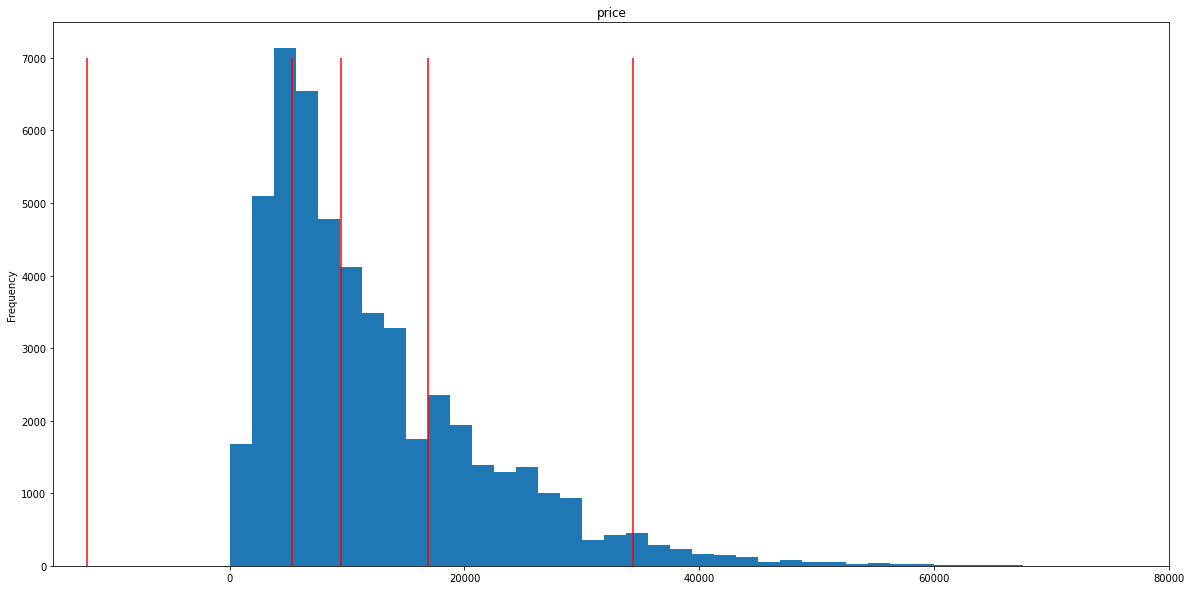

In [104]:
df_price_wo_0.plot(kind='hist', bins=200, figsize=(20,10), title='price')
plt.xlim(-15000, 80000)
plt.vlines(x=[df_price_low_whisker, df_price_q1, df_price_median, df_price_q3, df_price_high_whisker], 
           ymin=0, 
           ymax=7000, 
           color='red'
          )

print('lower whisker: '+ str(df_price_low_whisker))
print('Q1: '+ str(df_price_q1))
print('median: '+ str(df_price_median))
print('Q3: '+ str(df_price_q3))
print('upper whisker: '+ str(df_price_high_whisker))

Dari histogram menunjukan bahwa data 25% mobil didalam dataset harganya dibawah 5,300 dollar dan 50% harganya dibawah 9,500 dollar. Selain itu, 25% mobil dengan harga tertinggi memiliki rentang 17,000 - 375,000 dollar.

<AxesSubplot:>

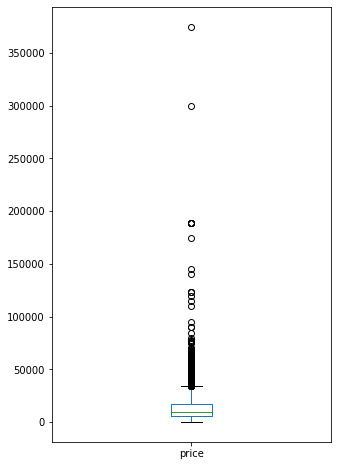

In [105]:
df_price_wo_0.plot.box(figsize = (5,8))

Berdasarkan histogram sebelumnya tersebut memperlihatkan bahwa nilai outlier banyak berada pada mobil dengan harga tinggi. Dan hal tersebut juga dikonfirmasi dengan visualisasi boxplot diatas.

__Usia Kendaraan Ketika Iklan Ditayangkan__

In [106]:
df_car_age = df_all_filled.loc[df_all_filled['model_year'] > 0, 'car_age']

Sebelum membuat histogram, Saya melakukan filter terhadap data model_year yang memiliki nilai 0.

In [107]:
df_car_age_desc = df_car_age.describe()
df_car_age_desc

count    47906.000000
mean         8.601386
std          6.237996
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

Nilai paling kecil 0, artinya ada mobil baru atau mobil yang dijual pada tahun yang sama. Sebaliknya, nilai yang paling besar adalah 110. Mobil berusia 110 tahun mungkin adalah sebuah mobil antik atau koleksi.

In [108]:
df_car_age_desc_median = df_car_age_desc['50%']
df_car_age_desc_q1 = df_car_age_desc['25%']
df_car_age_desc_q3 = df_car_age_desc['75%']
df_car_age_desc_iqr = df_car_age_desc_q3 - df_car_age_desc_q1
df_car_age_desc_low_whisker = df_car_age_desc_q1 - df_car_age_desc_iqr*1.5
df_car_age_desc_high_whisker = df_car_age_desc_q3 + df_car_age_desc_iqr*1.5

lower whisker: -8.0
Q1: 4.0
Median: 7.0
Q3: 12.0
upper whisker: 24.0


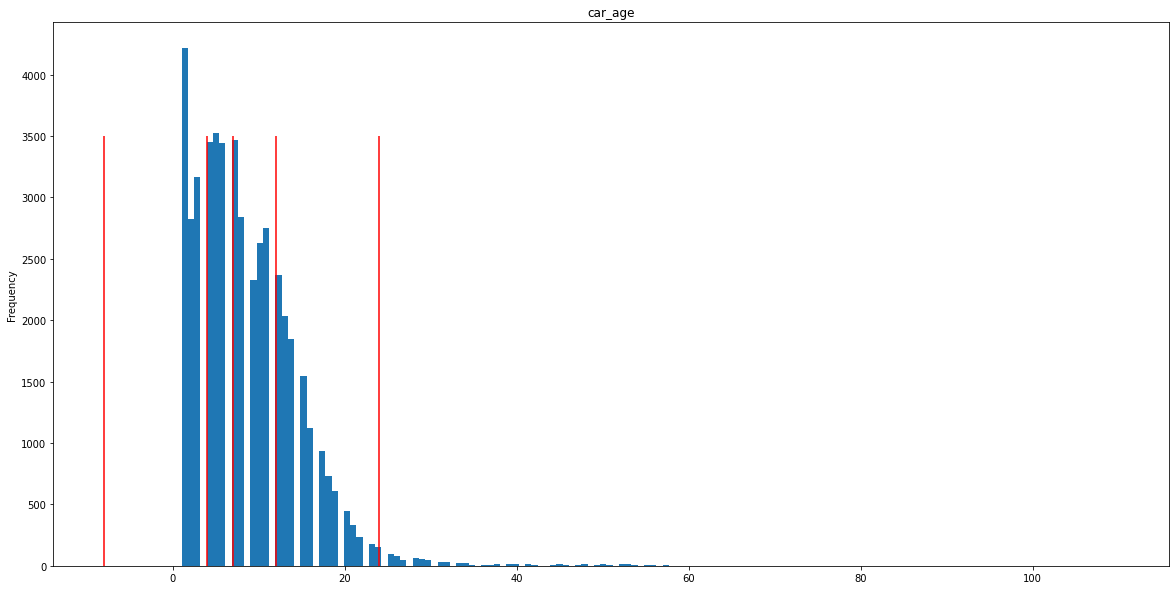

In [109]:
df_car_age.plot(kind='hist', bins=150, figsize=(20,10), title='car_age')

plt.vlines(x=[df_car_age_desc_low_whisker, df_car_age_desc_q1, df_car_age_desc_median, df_car_age_desc_q3, df_car_age_desc_high_whisker], 
           ymin=0, 
           ymax=3500, 
           color='red'
          )

print('lower whisker: '+ str(df_car_age_desc_low_whisker))
print('Q1: '+ str(df_car_age_desc_q1))
print('Median: '+ str(df_car_age_desc_median))
print('Q3: '+ str(df_car_age_desc_q3))
print('upper whisker: '+ str(df_car_age_desc_high_whisker))

Sebanyak 25% mobil didalam dataset berusia 4 tahun kebawah, sedangkan setengahnya berusia 7 tahun kebawah. Namun 25% mobil yang usianya relatif lebih tua memiliki rentang 13 - 110 tahun.

<AxesSubplot:>

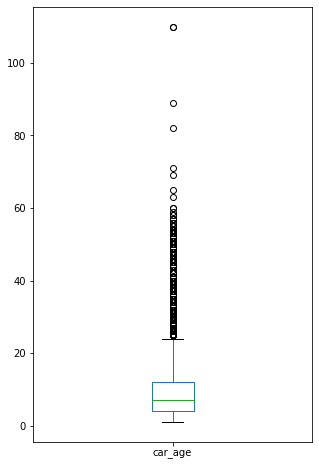

In [110]:
df_car_age.plot.box(figsize = (5, 8))

Berdasarkan histogram sebelumnya, 25% mobil yang usialnya relatif lebih tua memiliki sangat besar, 97 tahun. Hal tersebut bisa menimbulkan nilai outlier dan dikonformasi melalui boxplot diatas.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

__Jarak Tempuh__

In [111]:
df_odo = df_all_filled.loc[df_all_filled['odometer'] > 0, 'odometer']

Saya melakukan filter terlebih dahulu terhadap nilai odometer yang hilang dan diganti dengan 0.

In [112]:
df_odo_desc = df_odo.describe()
df_odo_desc

count     43448.000000
mean     116045.484165
std       64793.926032
min           1.000000
25%       70765.000000
50%      113358.500000
75%      155033.500000
max      990000.000000
Name: odometer, dtype: float64

In [113]:
df_odo_desc_median = df_odo_desc['50%']
df_odo_desc_q1 = df_odo_desc['25%']
df_odo_desc_q3 = df_odo_desc['75%']
df_odo_desc_iqr = df_odo_desc_q3 - df_odo_desc_q1
df_odo_desc_low_whisker = df_odo_desc_q1 - df_odo_desc_iqr*1.5
df_odo_desc_high_whisker = df_odo_desc_q3 + df_odo_desc_iqr*1.5

lower whisker: -55637.75
Q1: 70765.0
Median: 113358.5
Q3: 155033.5
upper whisker: 281436.25


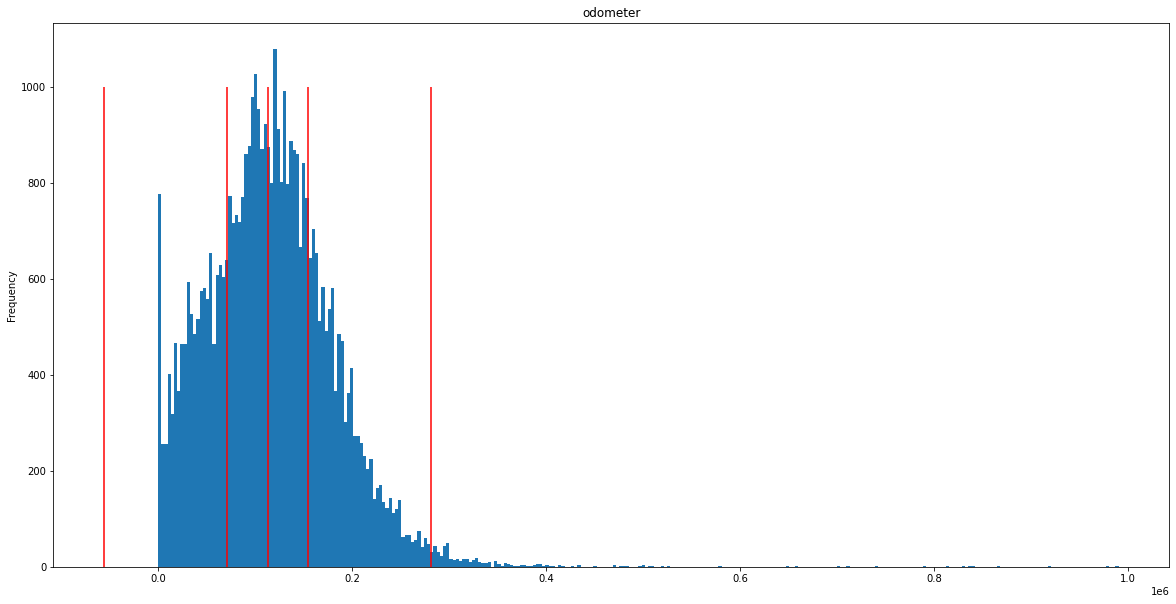

In [114]:
df_odo.plot(kind='hist', bins=300, figsize=(20,10), title='odometer')

plt.vlines(x=[df_odo_desc_low_whisker, df_odo_desc_q1, df_odo_desc_median, df_odo_desc_q3, df_odo_desc_high_whisker], 
           ymin=0, 
           ymax=1000, 
           color='red'
          )

print('lower whisker: '+ str(df_odo_desc_low_whisker))
print('Q1: '+ str(df_odo_desc_q1))
print('Median: '+ str(df_odo_desc_median))
print('Q3: '+ str(df_odo_desc_q3))
print('upper whisker: '+ str(df_odo_desc_high_whisker))

Dari histogram diatas dapat dilihat sekitar 50% mobil didalam dataset berada dibawah 113,400 kilometer. Namun mendekati ada penumpukan frekuensi sekitar 800 mobil yang mendekati nilai 0 kilometer. Kurang lazim tampaknya seseorang menjual mobil bekas pada kilometer yang masih terlalu rendah. Hal ini perlu ditindaklanjuti pada tahap selanjutnya.

<AxesSubplot:>

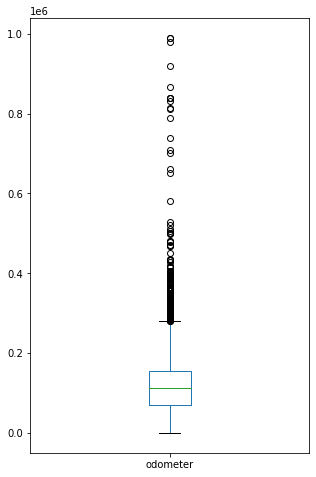

In [115]:
df_odo.plot.box(figsize = (5, 8))

__Jumlah Silinder__

In [116]:
df_cylinders = df_all_filled.copy()
df_cylinders = df_cylinders['cylinders']
df_cylinders.describe()

count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

nilai mean dan median tidak berbeda banyak. Hal itu dapat menjadi indikasi nilai outlier tidak adanya nilai outlier.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


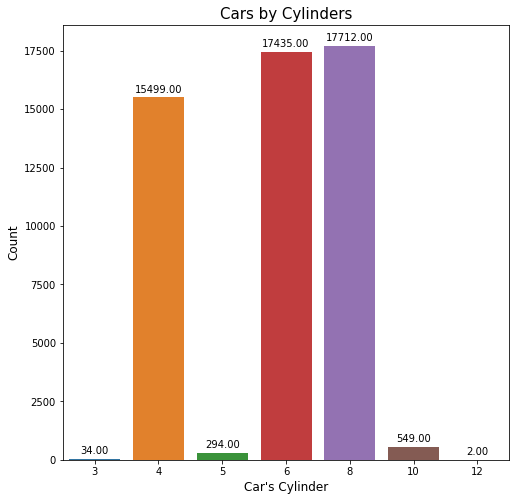

In [117]:
plt.figure(figsize=(8, 8))
plots = sns.countplot(df_cylinders)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel("Count", size=12)
plt.xlabel("Car's Cylinder", size=12) 
    
plt.title('Cars by Cylinders', size=15)
plt.show()

Umumnya mobil pada dataset memiliki silinder 4, 6, dan 8. Mobil-mobil dengan silinder 3, 5, 10, dan 12 jumlahnya tidak banyak.

<AxesSubplot:>

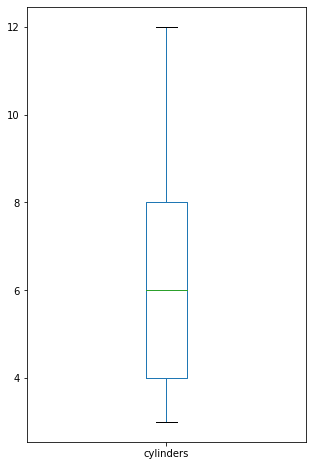

In [118]:
df_cylinders.plot.box(figsize = (5, 8))

Dugaan saya sebelumnya benar bahwa tidak ada outlier. Meskipun jarak upper whisker lebih tinggi dibandingkan lower whisker.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

__Kondisi__

Karena nilai kondisi dari awal sudah terisi semua, maka saya tidak melakukan filter.

In [119]:
df_condition = df_all_filled.copy()
df_condition = df_condition['condition']
df_condition.describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

Nilai mean lebih rendah dibandingkan nilai mediannya. Kemungkinan mobil dengan kondisi 3 kebawah, sehingga membual nilai mean tertarik kebawah nilai median. Selain itu, nilai mean dan median relatif sama kadang mengindikasikan minimnya nilai outlier.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


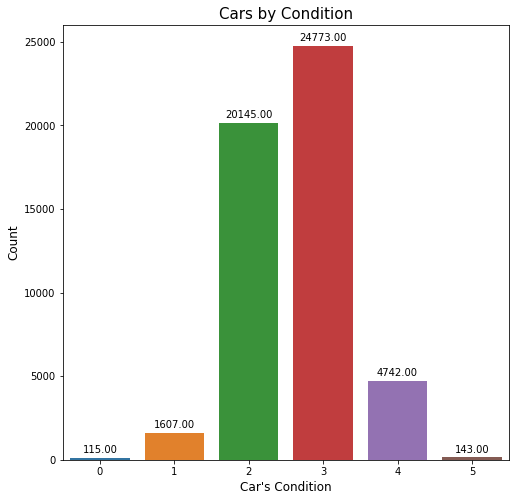

In [120]:
plt.figure(figsize=(8, 8))
plots = sns.countplot(df_condition)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel("Count", size=12)
plt.xlabel("Car's Condition", size=12) 
    
plt.title('Cars by Condition', size=15)
plt.show()


Nilai kondisi terbanyak 3, yang kedua adalah 2. Hal tersebut yang menyebabkan nilai mean lebih rendah dibandingkan nilai median.

<AxesSubplot:>

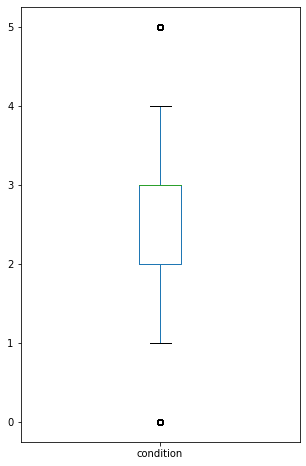

In [121]:
df_condition.plot.box(figsize = (5, 8))

Ternyata nilai median dan mean yang relatif dekat tidak menjamin tidak adanya outlier. Karena ternyata nilai 0 dan 5 dianggap outlier.

## Mempelajari dan Menangani Outlier

[Dengan hasil di atas, tentukan kolom apa yang mungkin berisi *outlier*, dan buatlah sebuah DataFrame tanpa *outlier* tersebut. Petunjuk: *Outlier* dapat diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.]

In [122]:
# Tentukan batas bawah outlier 

bottom_price = 500

menurut data dari https://cars.usnews.com/cars-trucks/advice/cars-for-under-1000?slide=18 mobil bekas di Amerika yang masih berfungsi normal paling minim berada di harga 500 dollar.

In [123]:
# Tentukan batas atas outlier 

upper_price = 34319
upper_age = 24
upper_odo = 281436.25

Batas atas outlier ditentukan dari upper whisker masing-masing parameter inti.

In [124]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah

df_wo_ol = df_all_filled.copy()
df_wo_ol = df_wo_ol.loc[(df_wo_ol['price'] > bottom_price) & (df_wo_ol['price'] < upper_price)]
df_wo_ol = df_wo_ol.loc[df_wo_ol['car_age'] < upper_age]
df_wo_ol = df_wo_ol.loc[df_wo_ol['odometer'] < upper_odo]

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mempelajari Parameter Inti Tanpa Outlier

__Harga__

In [125]:
df_wo_ol_prc = df_wo_ol['price'].copy()
df_wo_ol_prc_desc = df_wo_ol_prc.describe()
df_wo_ol_prc_desc

count    43963.000000
mean     11474.308782
std       7685.265733
min        534.000000
25%       5450.000000
50%       9141.000000
75%      15995.000000
max      34275.000000
Name: price, dtype: float64

Nilai minimum harga mobil didalam dataset baru sudah diatas 500 dollar.

Q1: 5450.0
median: 9141.0
Q3: 15995.0


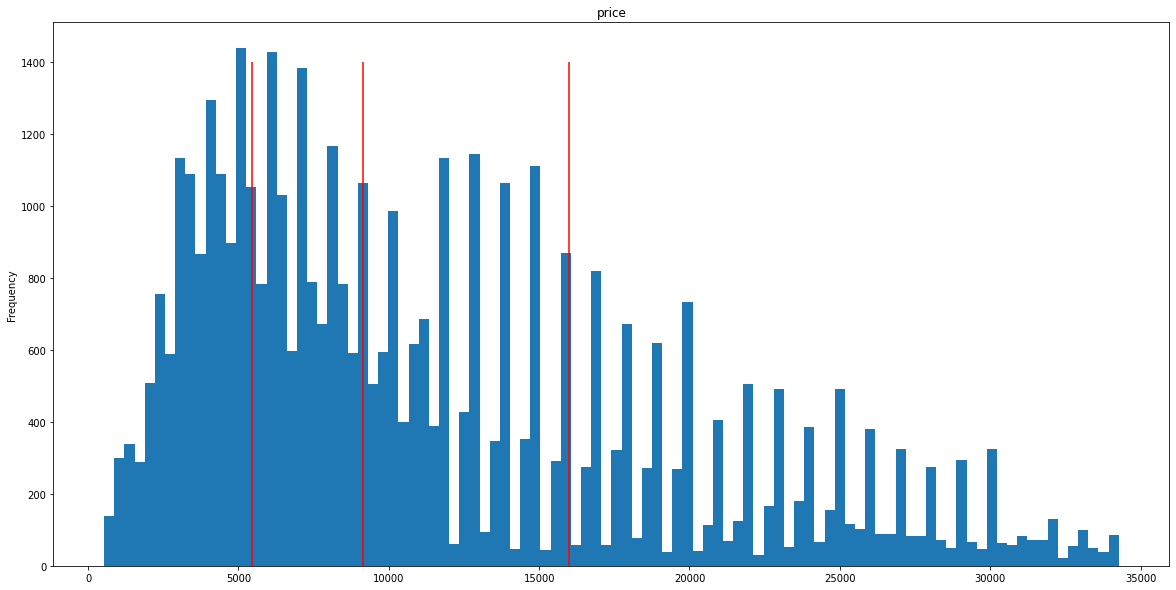

In [126]:
df_wo_ol_prc.plot(kind='hist', bins=100, figsize=(20,10), title='price')

plt.vlines(x=[df_wo_ol_prc_desc['25%'], df_wo_ol_prc_desc['50%'], df_wo_ol_prc_desc['75%']], 
           ymin=0, 
           ymax=1400, 
           color='red'
          )

print('Q1: '+ str(df_wo_ol_prc_desc['25%']))
print('median: '+ str(df_wo_ol_prc_desc['50%']))
print('Q3: '+ str(df_wo_ol_prc_desc['75%']))

Nilai median setelah tanpa outlier turun dibandingkan dengan outlier yang tadinya bernilai 9,495. Rentang harga antara nilai min dengan median lebih pendek dibandingkan antara nilai median dengan max. Hal itu disebabkan distribusi frekuensi harga mobil yang diatas median menyebar dibandingkan yang dibawah median.

<AxesSubplot:>

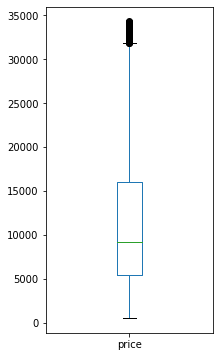

In [127]:
df_wo_ol_prc.plot.box(figsize = (3, 6))

Meskipun telah difilter, nilai outlier tetap ada. Hal tersebut terjadi karena setelah difilter, nilai q1, median, q3 , upper, dan lower whisker menjadi berubah. Dengan perubahan itu maka batas outlier menjadi berubah juga dan memungkinkan masih adanya data yang dianggap outlier pada dataset baru ini. Namun perbedaanya nilai outlier pada dataset baru ini rentangnya lebih pendek dibandingkan sebelumnya.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

__Usia Kendaraan__

In [128]:
df_wo_ol_age = df_wo_ol['car_age'].copy()
df_wo_ol_age_desc = df_wo_ol_age.describe()
df_wo_ol_age_desc

count    43963.000000
mean         8.391443
std          5.057048
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         23.000000
Name: car_age, dtype: float64

Usia maksimum telah berubah dari 110 menjadi 23 tahun karena telah dipotong sesuai batas upper whisker.

Q1: 4.0
median: 8.0
Q3: 12.0


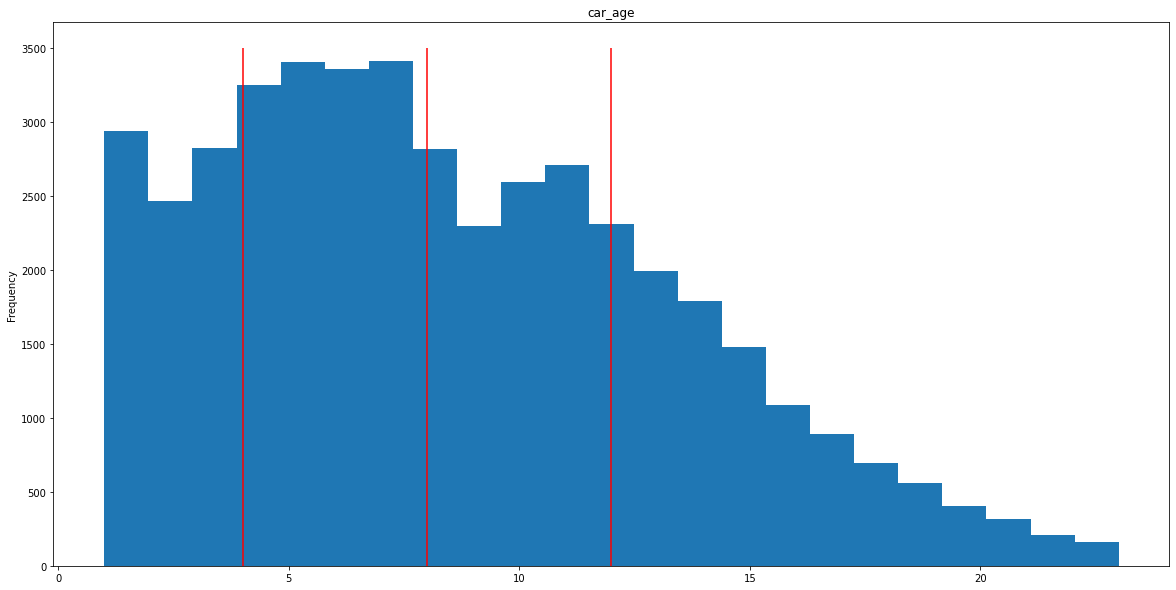

In [129]:
df_wo_ol_age.plot(kind='hist', bins=23, figsize=(20,10), title='car_age')

plt.vlines(x=[df_wo_ol_age_desc['25%'], df_wo_ol_age_desc['50%'], df_wo_ol_age_desc['75%']], 
           ymin=0, 
           ymax=3500, 
           color='red'
          )

print('Q1: '+ str(df_wo_ol_age_desc['25%']))
print('median: '+ str(df_wo_ol_age_desc['50%']))
print('Q3: '+ str(df_wo_ol_age_desc['75%']))

Dari histogram yang telah dipotong nilai outliernya, nilai Q1 dan Q3 tidak berubah. Nilai median naik satu poin dari 7 menjadi 8. Hal tersebut menarik, karena nilai Q1, median dan Q3 meskipun nilai outliernya telah dipotong.

<AxesSubplot:>

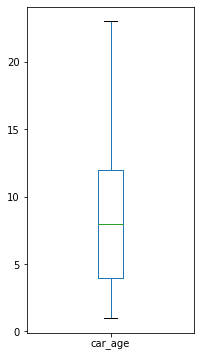

In [130]:
df_wo_ol_age.plot.box(figsize=(3,6))

Tidak ada nilai yang dianggap outier pada parameter usia dataset baru ini.

__Jarak Tempuh__

In [131]:
df_wo_ol_odo = df_wo_ol.loc[df_wo_ol['odometer'] > 0, 'odometer'].copy()
df_wo_ol_odo_desc = df_wo_ol_odo.describe()
df_wo_ol_odo_desc

count     37020.000000
mean     117061.151567
std       57893.338822
min           1.000000
25%       76000.000000
50%      116000.000000
75%      155551.250000
max      281155.000000
Name: odometer, dtype: float64

Q1: 76000.0
median: 116000.0
Q3: 155551.25


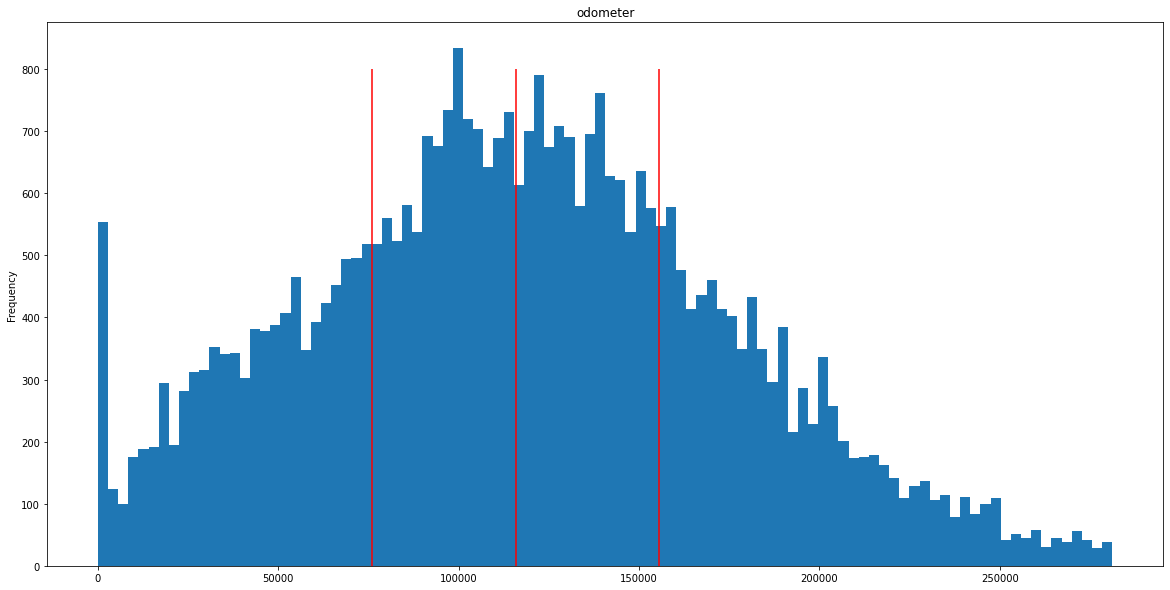

In [132]:
df_wo_ol_odo.plot(kind='hist', bins=100, figsize=(20,10), title='odometer')

plt.vlines(x=[df_wo_ol_odo_desc['25%'], df_wo_ol_odo_desc['50%'], df_wo_ol_odo_desc['75%']], 
           ymin=0, 
           ymax=800, 
           color='red'
          )

print('Q1: '+ str(df_wo_ol_odo_desc['25%']))
print('median: '+ str(df_wo_ol_odo_desc['50%']))
print('Q3: '+ str(df_wo_ol_odo_desc['75%']))

Dari histogram data yang telah dipotong outliernya, perubahan terbesar terjadi pada nilai Q1 meningkat sekitar 6000 kilometer dari 70.000 menjadi 76.000. Nilai median meningkat sekitar 3000 kilometer dari 113.000 menjadi 116.000. Sedangkan nilai Q3 tidak terlalu banyak berubah masih pada kisaran 155.000 kilometer.

<AxesSubplot:>

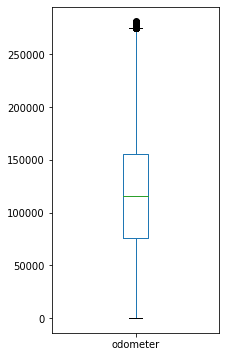

In [133]:
df_wo_ol_odo.plot.box(figsize=(3,6))

Yang terjadi adalah parameter odometer mirip dengan yang terjadi pada parameter price. Masih ada nilai outlier pada dataset baru, namun rentangnya lebih pendek.

__Jumlah Silinder__

In [134]:
df_wo_ol_cyl = df_wo_ol['cylinders'].copy()
df_wo_ol_cyl_desc = df_wo_ol_cyl.describe()
df_wo_ol_cyl_desc

count    43963.000000
mean         6.032914
std          1.633267
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


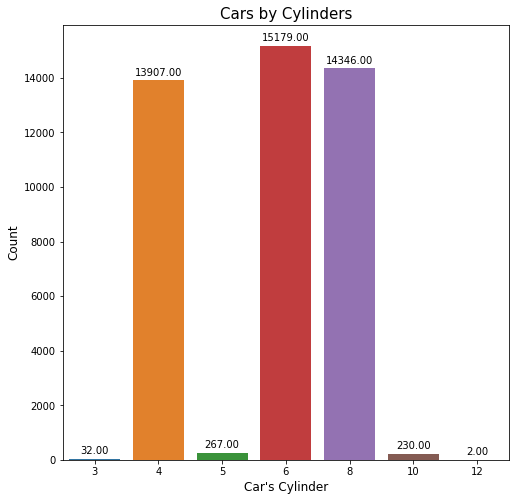

In [135]:
plt.figure(figsize=(8, 8))
plots = sns.countplot(df_wo_ol_cyl)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel("Count", size=12)
plt.xlabel("Car's Cylinder", size=12) 
    
plt.title('Cars by Cylinders', size=15)
plt.show()

Setelah nilai outlier nya dipotong, tidak banyak berubah pada diagram batang cylinders. Nilai Q1, median, & Q3 tidak berubah.

<AxesSubplot:>

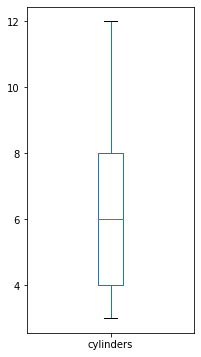

In [136]:
df_wo_ol_cyl.plot.box(figsize=(3,6))

Pada parameter ___cylinder___ tidak banyak berubah, tidak ada nilai outlier dan median masih sama berada pada nilai 6.

__Kondisi__

In [137]:
df_wo_ol_con = df_wo_ol['condition'].copy()
df_wo_ol_con_desc = df_wo_ol_con.describe()
df_wo_ol_con_desc

count    43963.000000
mean         2.626527
std          0.698627
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


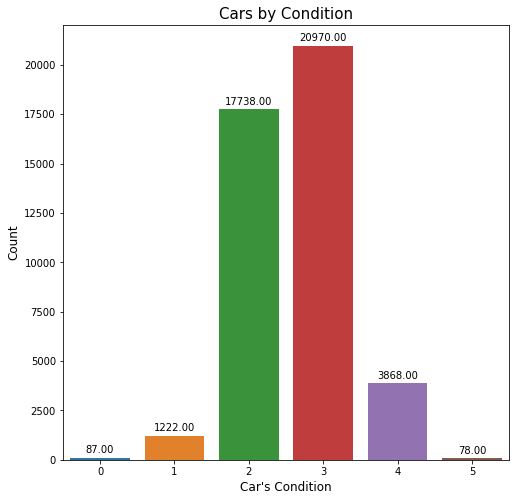

In [138]:
plt.figure(figsize=(8, 8))
plots = sns.countplot(df_wo_ol_con)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel("Count", size=12)
plt.xlabel("Car's Condition", size=12) 
    
plt.title('Cars by Condition', size=15)
plt.show()

Setelah nilai outlier nya dipotong, tidak banyak berubah pada diagram batang ___cylinders___. Nilai Q1, median, & Q3 tidak berubah. Kurang lebih mirip dengan yang terjadi pada kolom ___cylinders___.

<AxesSubplot:>

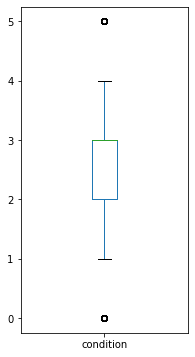

In [139]:
df_wo_ol_con.plot.box(figsize=(3,6))

Pada parameter ___condition___ kurang lebih serupa dengan yang terjadi pada ___cylinder___. Tidak banyak berubah. nilai median sama dan sama seperti dataset sebelumnya. Nilai 5 dan 0 juga dianggap outlier.

## Masa Berlaku Iklan 
[Pelajari berapa hari iklan ditayangkan (`days_listed`). Hitung rata-rata dan mediannya. Jelaskan berapa lama umumnya sebuah iklan ditayangkan. Tentukan kapan iklan dihapus dengan cepat, dan kapan iklan ditayangkan dalam waktu yang sangat lama.]

median: 33.0
mean: 39.58183017537475


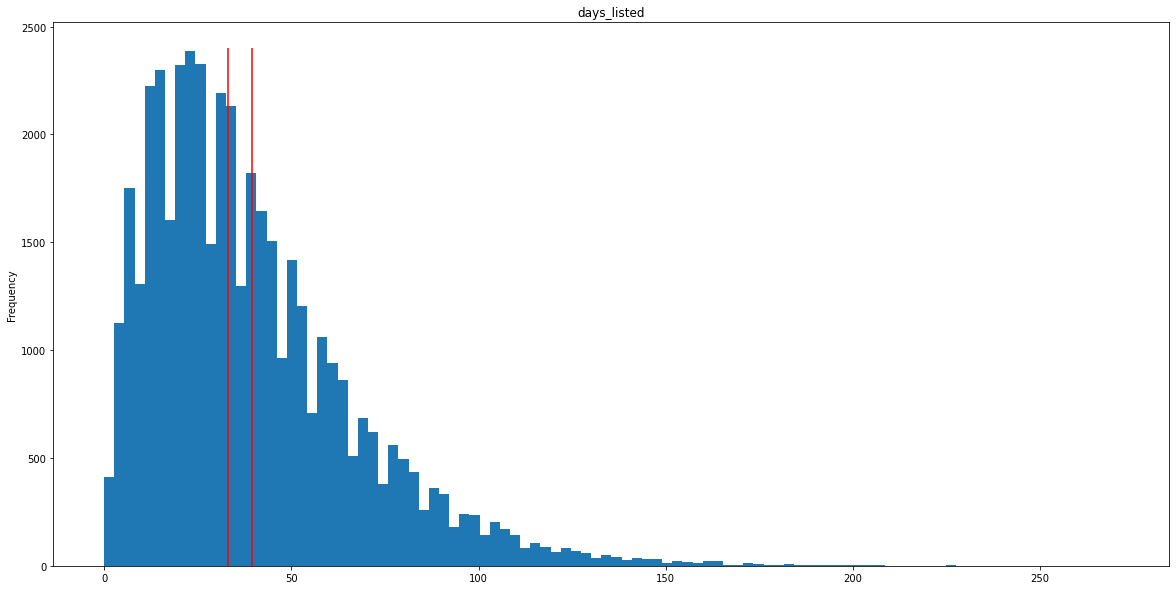

In [140]:
days_listed_desc = df_wo_ol['days_listed'].describe()
days_listed_desc

print('median: '+ str(days_listed_desc['50%']))
print('mean: '+ str(days_listed_desc['mean']))

df_wo_ol['days_listed'].plot(kind='hist', bins=100, figsize=(20,10), title='days_listed')

plt.vlines(x=[days_listed_desc['50%'], days_listed_desc['mean']], 
           ymin=0, 
           ymax=2400, 
           color='red'
          )

plt.show()

Nilai mean lebih tinggi dibandingkan nilai median disebabkan nilai mean tertarik keatas karena ada mobil-mobil yang membutuhkan waktu mengiklankan relatif lebih lama dibandingkan mobil pada umumnya. Seperti yang terlihat pada histogram ada mobil-mobil yang membutuhkan waktu mengiklan lebih dari 100 hari.

In [141]:
year_month_days_listed = df_wo_ol.pivot_table(
    index=['year_posted', 'month_posted'],
    values = 'days_listed',
    aggfunc=['median', 'mean'])

year_month_days_listed.columns = ['median', 'mean']
year_month_days_listed

median       mean
year_posted month_posted                   
2018        5                 34  39.965204
            6                 34  39.622346
            7                 33  39.361619
            8                 33  39.017838
            9                 33  39.726937
            10                33  38.896395
            11                33  39.928875
            12                33  39.093412
2019        1                 33  39.333245
            2                 33  40.285924
            3                 34  40.103519
            4                 34  39.850292

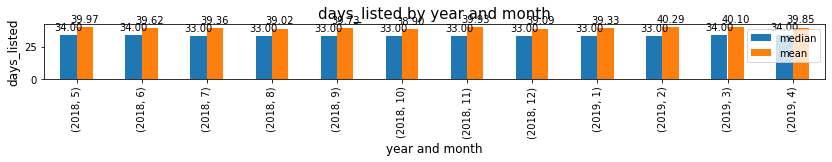

In [142]:
plots = year_month_days_listed.plot(kind='bar', 
                            figsize=(14,1))

for bar in plots.patches:
    
        plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel("days_listed", size=12)
plt.xlabel("year and month", size=12)     
plt.title('days_listed by year and month', size=15)

plt.show()

Saya mengelompokan days_listed bedasarkan tahun dan bulan iklan diposting. Jika dilihat dari tabel dan grafik diatas, tidak banyak perbededaan nilai mean atau median dari waktu iklan ditayangkan dari beberapa bulan data dikumpulkan.

## Harga Rata-Rata Setiap Jenis Kendaraan

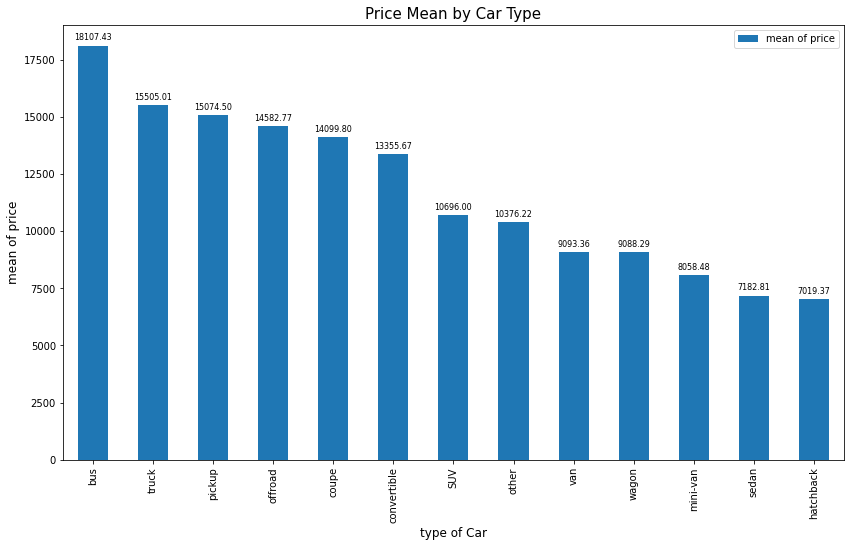

In [143]:
price_by_type = df_wo_ol.pivot_table(
    index='type',
    values='price',
    aggfunc='mean')

price_by_type.columns = ['mean of price']

plots = price_by_type.sort_values('mean of price', ascending=False).plot(kind='bar', 
                figsize=(14,8))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('mean of price', size=12)
plt.xlabel('type of Car', size=12)
plt.title('Price Mean by Car Type', size=15)
plt.show()

Dari diagram batang diatas menunjukkan rata-rata harga tertinggi dimiliki oleh mobil-mobil besar, yaitu bus, truck, dan pickup. Untuk mobil penumpang SUV memiliki harga rata-rata tertinggi, sedangkan hatchback menjadi tipe mobil dengan harga rata-rata terendah.

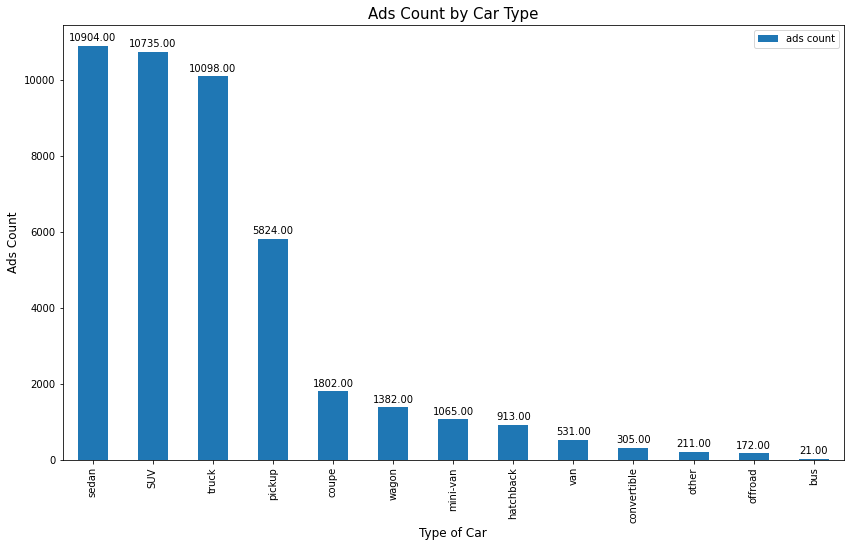

In [144]:
ads_by_type = df_wo_ol.pivot_table(
    index='type',
    values='price',
    aggfunc='count')

ads_by_type.columns = ['ads count']

plots = ads_by_type.sort_values('ads count', ascending=False).plot(kind='bar', 
                figsize=(14,8))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Ads Count', size=12)
plt.xlabel('Type of Car', size=12)
plt.title('Ads Count by Car Type', size=15)

plt.show()

Dari diagram batang diatas, dapat dilihat mobil penumpang yang diwakili oleh sedan dan SUV mendominasi jumlah iklan. Meskipun bus memiliki harga yang tinggi, tetapi tidak banyak iklannya. Truck memiliki iklan yang cukup banyak dan dengan harga yang cukup tinggi.

## Faktor Harga

Berdasarkan dari data jumlah iklan per tipe kendaraan. Maka saya kan mengambil 2 tipe kendaraan paling populer, yaitu sedan dan SUV untuk dilihat korelasinya. Faktor-faktor yang dilihat korelasinya adalah antara usia, odomedter, dan kondisi dengan harga.

__Sedan__

In [145]:
df_wo_ol_sedan =df_wo_ol.loc[df_wo_ol['type'] == 'sedan'].copy()
df_wo_ol_sedan_scat = df_wo_ol_sedan.loc[df_wo_ol_sedan['odometer'] > 0, ['type', 'car_age', 'odometer', 'condition', 'price']]
df_wo_ol_sedan_cat = df_wo_ol_sedan.loc[(df_wo_ol_sedan['paint_color'] != 'unknown') & (df_wo_ol_sedan['transmission'] != 'other'), ['transmission', 'paint_color', 'price']]

Untuk yg pertama mari kita lihat scatter plot dan matriks korelasi dari faktor-faktor dengan nilai numerik, yaitu usia, jarak tempuh, dan kondisi.

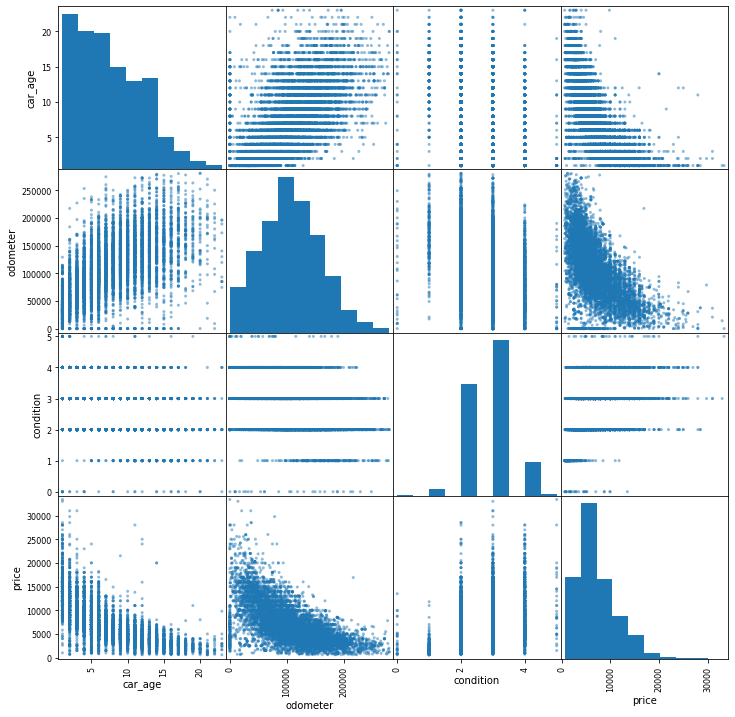

            car_age  odometer  condition     price
car_age    1.000000  0.597095  -0.302395 -0.702354
odometer   0.597095  1.000000  -0.330596 -0.631481
condition -0.302395 -0.330596   1.000000  0.322170
price     -0.702354 -0.631481   0.322170  1.000000


In [146]:
pd.plotting.scatter_matrix(df_wo_ol_sedan_scat, figsize = (12,12))
plt.show()
print(df_wo_ol_sedan_scat.corr())

Dari matriks korelasi dapat dilihat bahwa ada korelasi negatif antara price dengan car_age dan odometer pada mobil sedan. Yang artinya, semakin tinggi usia dan kilometer mobil, harga mobil cenderung semakin rendah.

Untuk faktor condition sayangnya tidak terlalu berkaitan dengan price. Pada plot korelasi dapat dilihat memang mobil sedan dengan skor condition 2 sampai 5 memiliki mobil-mobil dengan price yang lebih tinggi dibandingkan pada condition 0 sampai 1. Namun korelasi menjadi tidak terlalu kuat karena pada mobil dengan skor condition 2 sampai 5 juga masih banyak terdapat mobil dengan price yang rendah.

Sekarang saya akan melihat korelasi faktor yang kategorikal. Sebelum memulai, saya akan memeriksa terlebih duhulu jumlah iklannya.

In [147]:
print('Jumlah iklan berdasarkan transmisi:')
print(df_wo_ol_sedan_cat['transmission'].value_counts())
print()
print('Jumlah iklan berdasarkan warna:')
print(df_wo_ol_sedan_cat['paint_color'].value_counts())

Jumlah iklan berdasarkan transmisi:
automatic    8462
manual        432
Name: transmission, dtype: int64

Jumlah iklan berdasarkan warna:
silver    1848
black     1608
grey      1476
white     1337
blue      1098
red        832
custom     239
brown      233
green      179
purple      21
yellow      16
orange       7
Name: paint_color, dtype: int64


Mobil dengan transmisi otomatis jauh lebih banyak dibandingkan manual. Selain itu, Ada beberapa warna yang jumlah iklannya dibawah 50. Oleh karena itu, warna-warna tersebut perlu difilter sebelum dibuat boxplotnya.

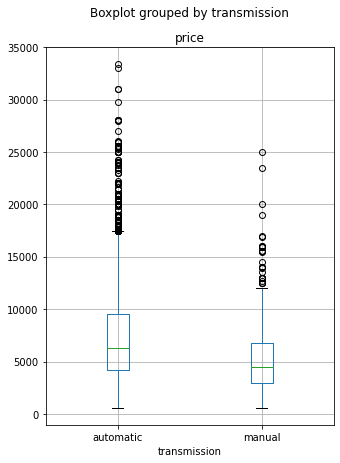

In [148]:
df_wo_ol_sedan_cat.boxplot(column='price', by='transmission', figsize=(5,7))
plt.show()

Dari boxplot diatas dapat dilihat harga mobil sedan dengan transmission automatic lebih tinggi dibandingkan manual.

In [149]:
df_wo_ol_sedan_cat = df_wo_ol_sedan_cat.loc[(df_wo_ol_sedan_cat['paint_color'] != 'purple') & (df_wo_ol_sedan_cat['paint_color'] != 'yellow')]
df_wo_ol_sedan_cat =  df_wo_ol_sedan_cat.loc[(df_wo_ol_sedan_cat['paint_color'] != 'orange')]
df_wo_ol_sedan_cat['paint_color'].value_counts()

silver    1848
black     1608
grey      1476
white     1337
blue      1098
red        832
custom     239
brown      233
green      179
Name: paint_color, dtype: int64

Warna-warna yang dibawah 50 iklan sudah difilter, sehingga sekarang variabel dapat digunakan untuk memunculkan boxplot.

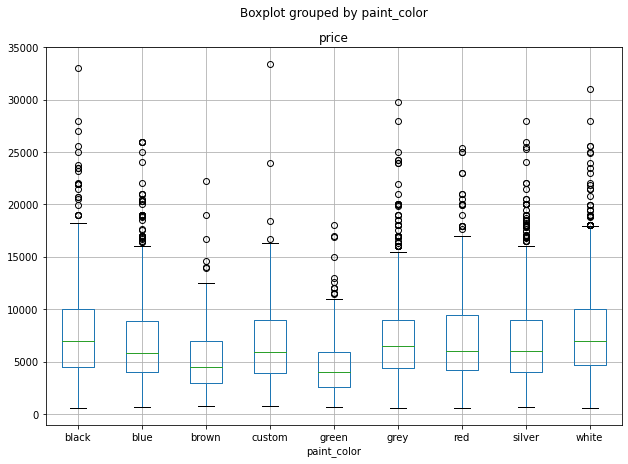

In [150]:
df_wo_ol_sedan_cat.boxplot(column='price', by='paint_color', figsize=(10,7))
plt.show()

Dari visualisasi boxplot diatas dapat dilihat warna black dan white cenderung lebih tinggi pricenya dibandingkan warna lainnya.

__SUV__

In [151]:
df_wo_ol_suv =df_wo_ol.loc[df_wo_ol['type'] == 'SUV'].copy()
df_wo_ol_suv_scat = df_wo_ol_suv.loc[df_wo_ol_suv['odometer'] > 0, ['type', 'car_age', 'odometer', 'condition', 'price']]
df_wo_ol_suv_cat = df_wo_ol_suv.loc[(df_wo_ol_suv['paint_color'] != 'unknown') & (df_wo_ol_suv['transmission'] != 'other'), ['transmission', 'paint_color', 'price']]

seperti pada tipe mobil sedan sebelumnya, kita lihat terlebih dahulu scatter plot dan matriks korelasi dari faktor-faktor dengan nilai numerik. Yaitu usia, jarak tempuh, dan kondisi.

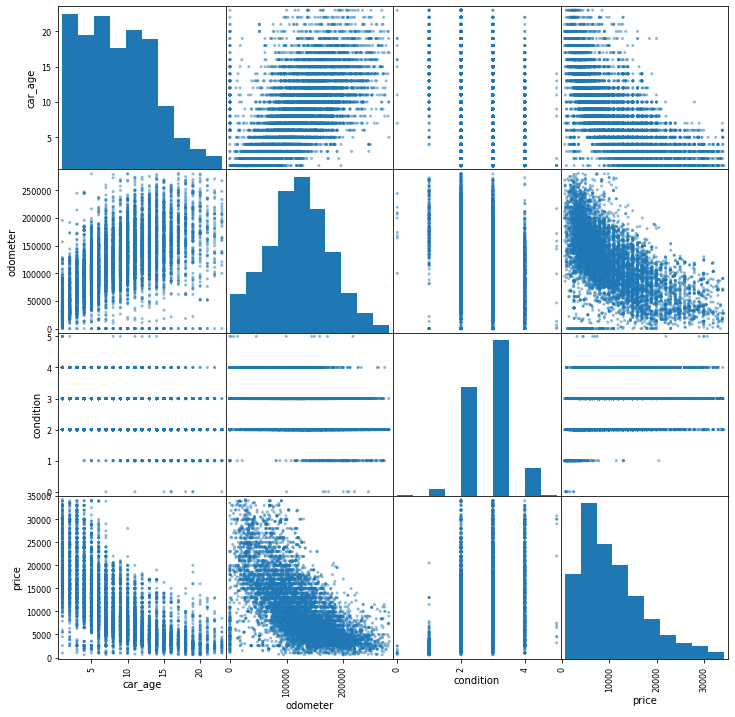

            car_age  odometer  condition     price
car_age    1.000000  0.597095  -0.302395 -0.702354
odometer   0.597095  1.000000  -0.330596 -0.631481
condition -0.302395 -0.330596   1.000000  0.322170
price     -0.702354 -0.631481   0.322170  1.000000


In [152]:
pd.plotting.scatter_matrix(df_wo_ol_suv_scat, figsize = (12,12))
plt.show()
print(df_wo_ol_sedan_scat.corr())

Apa yang terjadi pada tipe mobil SUV kurang lebih serupa dengan apa yang terjadi dengan sedan. Korelasi negatif terjadi antara price dengan car_age dan odometer pada mobil SUV. Yang artinya, semakin tinggi usia dan kilometer mobil, harga mobil cenderung semakin rendah.

Untuk faktor condition sayangnya tidak terlalu berkaitan dengan price. Pada plot korelasi dapat dilihat memang mobil SUV dengan skor condition 2 sampai 5 memiliki mobil-mobil dengan price yang lebih tinggi dibandingkan pada condition 0 sampai 1. Namun korelasi menjadi tidak terlalu kuat karena pada mobil SUV dengan skor condition 2 sampai 5 juga masih banyak terdapat mobil dengan price yang rendah.

Sekarang saya akan melihat korelasi faktor yang kategorikal. Sebelum memulai, saya akan memeriksa terlebih dahulu jumlah iklannya.

In [153]:
print('Jumlah iklan mobil SUV berdasarkan transmisi:')
print(df_wo_ol_suv_cat['transmission'].value_counts())
print()
print('Jumlah iklan mobil SUV berdasarkan warna:')
print(df_wo_ol_suv_cat['paint_color'].value_counts())

Jumlah iklan mobil SUV berdasarkan transmisi:
automatic    8389
manual        338
Name: transmission, dtype: int64

Jumlah iklan mobil SUV berdasarkan warna:
black     1848
white     1670
silver    1368
grey      1054
blue       904
red        801
green      371
brown      315
custom     251
orange      69
yellow      39
purple      37
Name: paint_color, dtype: int64


Serupa dengan tipe mobil sedan, mobil SUV dengan transmisi otomatis jauh lebih banyak dibandingkan manual. Selain itu, warna kuning dan ungu iklannya dibawah 50. Oleh karena itu, kedua warna tersebut tersebut perlu difilter sebelum dibuat boxplotnya.

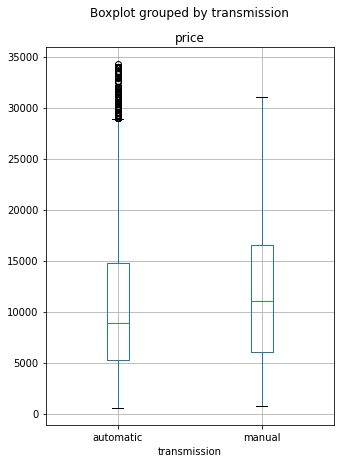

,SUV price mean
transmission,
automatic,10629.527357
manual,11789.532544


In [154]:
df_wo_ol_suv_cat.boxplot(column='price', by='transmission', figsize=(5,7))
plt.show()

suv_mean = df_wo_ol_suv_cat.pivot_table(index='transmission', values='price', aggfunc='mean')
suv_mean.columns = ['SUV price mean']
suv_mean

Hasilnya menarik karena berbeda dengan sedan. Pada SUV transmisi manual cenderung lebih tinggi dibandingkan automatic. Hal tersebut ditunjukan dari nilai mean dan mediannya.

In [155]:
df_wo_ol_suv_cat = df_wo_ol_suv_cat.loc[(df_wo_ol_suv_cat['paint_color'] != 'yellow') & (df_wo_ol_suv_cat['paint_color'] != 'purple')]
df_wo_ol_suv_cat['paint_color'].value_counts()

black     1848
white     1670
silver    1368
grey      1054
blue       904
red        801
green      371
brown      315
custom     251
orange      69
Name: paint_color, dtype: int64

Seluruh warna yang ada jumlah iklannya sudah diatas 50. Karena itu boxplot sudah bisa dilakukan.

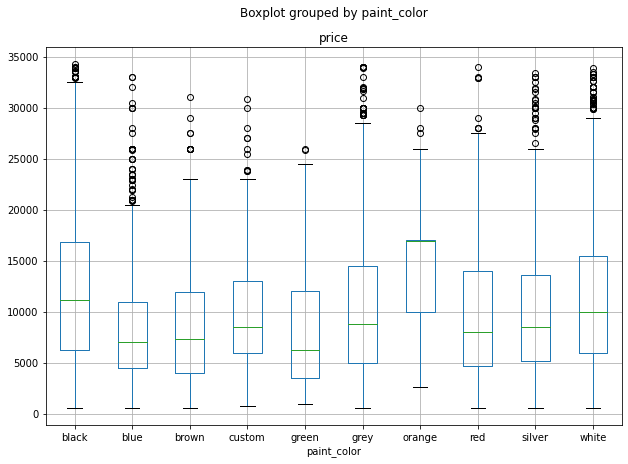

In [156]:
df_wo_ol_suv_cat.boxplot(column='price', by='paint_color', figsize=(10,7))
plt.show()

Berdasarkan boxplot diatas, pada tipe SUV mobil dengan warna black dan white lebih tinggi dibandingkan warna lainnya. Meskipun jumlahnya tidak banyak, warna orange juga memiliki harga yang relatif lebih tinggi dibandingkan warna lainnya.

## Kesimpulan Umum
[Tuliskan kesimpulan penting Anda di bagian akhir ini, pastikan kesimpulan tersebut menyertakan kesimpulan yang menjelaskan cara Anda memproses dan menganalisis data. Laporkan nilai yang hilang, duplikat, *outlier*, dan kemungkinan alasan serta solusi untuk permasalahan yang harus Anda tangani. Jangan lupa untuk menghapus semua komentar dalam tanda kurung sebelum mengirimkan proyek Anda.]

Sebelum memulai kesimpulan umum saya ada rasa penasaran untuk melihat apakah tipe mobil mempengaruhi days_listed. Ternyata days_listed rata-ratanya kurang lebih mirip disekitar 40 hari, kecuali pada bus.

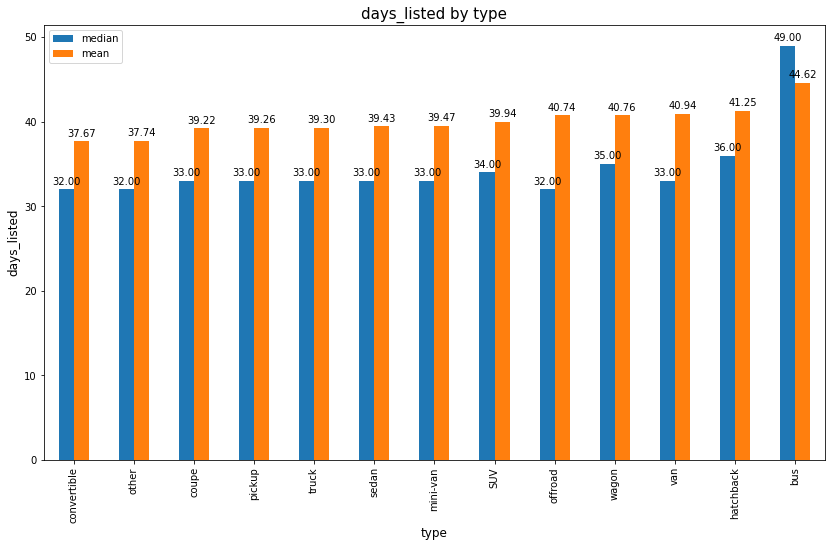

In [157]:
type_days_listed = df_wo_ol.pivot_table(
    index='type',
    values = 'days_listed',
    aggfunc=['median', 'mean'])

type_days_listed.columns = ['median', 'mean']

plots = type_days_listed.sort_values('mean').plot(kind='bar', 
                    figsize=(14,8))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('days_listed', size=12)
plt.xlabel('type', size=12)
plt.title('days_listed by type', size=15)

plt.show()

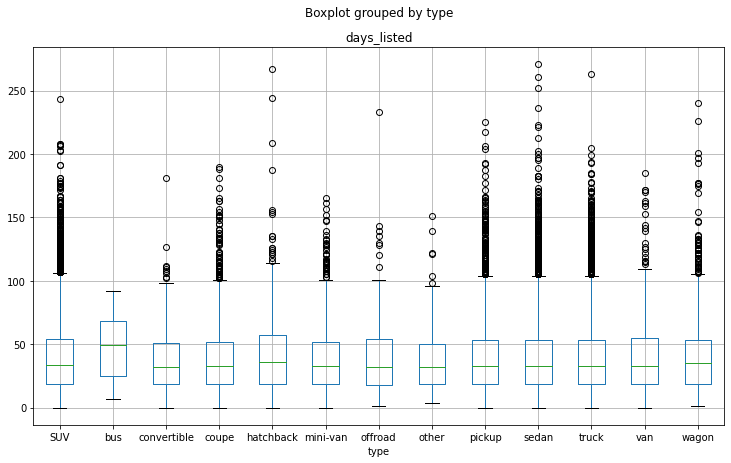

In [158]:
df_wo_ol.boxplot(column='days_listed', by='type', figsize=(12,7))
plt.show()

Berdasarkan eksplorasi yang telah dilakukan sebelumnya, ditemukan beberapa faktor yang mempengaruhi harga mobil. Faktor pertama adalah tipe mobil. Faktor Tipe mobil bersifat kategorikal. Mobil - mobil besar seperti bus, truck, pickup, dan offroad memiliki rata-rata harga antara sekitar 15,000 hingga 17,500 dollar. Selanjutnya mobil sedan mewah coupe dan convertible dengan harga rata-rata 12,500 - 15,000 dollar. Setelah itu baru masuk ke mobil penumpang dengah harga rata-rata sekitar 10,000 hinga 7,500 dollar. Mobil SUV menjadi mobil penumpang dengan harga rata-rata tertinggi berada, sedangkan hatchback sebaliknya.

Selain tipe, faktor kategorikal yang cukup berpengaruh terhadap harga adalah warna. Kendaraan dengan warna putih dan hitam relatif lebih tinggi dibandingkan warna lainnya. Mungkin karena warna putih dan hitam secara selera cukup netral sehingga relatif dapat diterima oleh banyak kalangan. Warna yang tidak umum seperti orange memiliki harga yang relatif tinggi pada tipe mobil SUV. Namun jumlahnya tidak banyak dan tidak terjadi pada sedan.

Transmisi kendaraan juga dapat menjadi penentu harga kendaraan. Awal saya memperkirakan pada era modern ini mobil dengan transmisi automatic harganya lebih tinggi karena lebih banyak peminat mobil bertransmisi automatic dibandingkan manual. Namun uniknya hal tersebut tidak terjadi secara universal. Berdasarkan eksplorasi yang dilakukan pada tipe mobil sedan hal tersebut berlaku, namun tidak pada SUV.

Pada faktor numerik usia dan jarak tempuh kendaraan berpengaruh terhadap harga mobil. Kedua faktor tersebut berkorelasi negatif terhadap harga mobil. artinya semakin tinggi usia dan semakin jauh jarak tempuh suatu mobil, maka harganya cenderung semakin rendah. Hal dapat disebabkan persepsi konsumen melihat faktor usia dan jarak tempuh sebagai salah satu faktor utama yang mengurangi daya pakai suatu mobil.